# Introduction: The Boston Housing Dataset

The dataset you'll work with in this assignment comes from a 1978 study about how house prices are related to clean air.  The dataset includes a training set with 404 examples and a test set with 102 examples, for a roughly 80/20, train/test split.  Like the MNIST handwritten digit recognition dataset, the Boston housing data is conveniently included in Keras.

Each example corresponds to a single house and bears 13 input variables describing various properties of that house, along with one output variable containing the price of the house.

All of the variables are numeric, but from variable to variable the range of values taken on varies, which means that standardizing the input data before using it in a model will be necessary.

You can read more about the data set [here](https://keras.io/api/datasets/boston_housing/), including links to descriptions of the model features.  The model's targets are in units of $1K.  You'll also notice an ethics warning in the dataset description, which points to the sort of issue that every practitioner of data science or ML should be mindful of as they work.

Throughout this assignment watch for **TODO** markers where you're supposed to complete code, and sections whose name starts with **QUESTION**, where you're supposed to answer some questions in text cells.

# Getting Started


## Typical Keras Imports

In [1]:
# You'll probably either cut and paste, or eventually rattle off from memory,
# lines like this at the start of every deep learning thing you ever do...
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import logging

2023-08-02 22:43:51.163474: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 22:43:52.093591: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.1.163/linux/tbb/lib/intel64_lin/gcc4.7:/opt/intel/compilers_and_libraries_2018.1.163/linux/compiler/lib/intel64_lin:/opt/intel/compilers_and_libraries_2018.1.163/linux/mkl/lib/intel64_lin::/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64/
2023-08-02 22:43:52.093723: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not

In [2]:
# Define some constants for use throughout...
EPOCHS = 500
BATCH_SIZE = 32

## Reading the Data

As we mentioned, the Boston housing data is distributed with Keras.

In [3]:
boston_housing = keras.datasets.boston_housing

# You might want to consult: https://keras.io/api/datasets/boston_housing/#load_data-function
# to see just what load_data is giving you back.
(x_train_raw, y_train), (x_test_raw, y_test) = boston_housing.load_data()

# TODO: Print out the shapes of the four subsets of the dataset above
for s in [x_train_raw, y_train, x_test_raw, y_test]:
    print(s.shape)

(404, 13)
(404,)
(102, 13)
(102,)


## QUESTION: Examining the Input Data's Shapes

When starting work with a dataset, it's always a good idea to inspect it and see how much data it contains, and what the shape of that data is.

1.   What are the dimensions of each of the four subsets of the dataset you loaded in the previous cell, i.e. the train and test inputs and outputs?
   The inputs have 13 features/dimensions and the outputs are unidimensional i.e. have one output value.
3.   Do the dimensions match what was claimed in the preamble to this notebook?
   Yes, the number of samples split between train and test match the preamble. Nothing about the number of features was mentioned in the preamble.

## Standardizing the Input Data

Standardize the features in the input data, by subtracting off the mean of each feature, and dividing by the feature's standard deviation, i.e.  

$$
{ (X-\mu) \over \sigma }
$$


In [4]:
# TODO compute means and standard deviations for the raw training set
x_mean = x_train_raw.mean(axis=0)
x_std  = x_train_raw.std(axis=0)
# print(x_mean)
# print(x_std)

In [5]:
# TODO standardize the raw training and test sets
x_train = np.asarray(list(map(lambda x: (x-x_mean)/x_std, x_train_raw)), dtype=np.float32)
x_test  = np.asarray(list(map(lambda x: (x-x_mean)/x_std, x_test_raw)), dtype=np.float32)

In [6]:
# print("Raw:", x_train_raw[0:2])
# print("Standardized:", x_train[0:2])
# print(type(x_train))
# print(type(x_train_raw))
# print(x_train.shape)
# print(x_train_raw.shape)
# maxs = np.max(x_train, 0)
# mins = np.min(x_train, 0)

# for i in range(13):
#     print(i,":", x_train[(x_train[:, i] > maxs[i]) & (x_train[:, i] < mins[i])])

# Creating a Basic Neural Network Model

We're going to try fitting a neural net based regression model using a network with:
  - one fully connected (`Dense` in Keras) layer of 64 units, with 'relu' activation, set up to take our input layer which has 13 units
  - a second fully connected layer of 64 units, also with 'relu' activation
  - an output layer of a single unit, with 'linear' activation (recall we use linear output units for regression problems).


In [7]:
from keras.api._v2.keras import activations

# Create the model object
model = Sequential(name="64R/64R/1L") # NOTE: You can choose meaningful names to put on model objects!
# TODO: Add the first hidden layer
model.add(Dense(64, 
                activation='relu'))
# TODO: Add the second hidden layer
model.add(Dense(64, 
                activation='relu'))
# TODO: Add the output layer
model.add(Dense(1)) # not adding the activation parameter here makes activation linear

2023-08-02 22:43:53.507164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 22:43:54.360395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14540 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [8]:
# TODO: Have Keras print a summary of your model.
#       Convince yourself the number of trainable parameters makes sense for
#       each layer. The notation for describing layers and their parameters
#       from lecture 2 might be helpful in organizing your thoughts as you
#       check.
model.build(x_train.shape)
model.summary()

Model: "64R/64R/1L"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (404, 64)                 896       
                                                                 
 dense_1 (Dense)             (404, 64)                 4160      
                                                                 
 dense_2 (Dense)             (404, 1)                  65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## Compile the Model


In [9]:
# from keras.engine.training import optimizer
from keras.optimizers import Adam

# TODO: Compile the model using the mean squared error loss function, the adam
#       optimizer, and mean absolute error in your metrics.  You might need to
#       consult the Keras documentation at https://keras.io/api/ or things we
#       demo'ed in class to get the specific details of the various
#       incantations.
model.compile(loss='mean_squared_error',      # You might have to look up just how to specify mean absolute error
              optimizer='adam', # You'll have to look up how to name Adam here, it's not tricky
              metrics=['mean_absolute_error', 'accuracy']) # You might also have to look up just how to specify mean absolute error

## Train the Model

In [10]:
# TODO: Train your model on the standardized training data.
#       Pass the test sets as your validation data.  Use the
#       number of epochs and batch size set in the EPOCHS
#       and BATCH_SIZE variables from the start of the notebook.
#
#       Also pass 'shuffle=True' and consult the Keras documentation
#       for model.fit() to understand what it's doing

history = model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))

Epoch 1/500


2023-08-02 22:43:57.098417: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1c0d9340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-02 22:43:57.098456: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2023-08-02 22:43:57.106287: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-02 22:43:57.255061: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 2s 19ms/step - loss: 562.3130 - mean_absolute_error: 21.8563 - accuracy: 0.0000e+00 - val_loss: 558.3603 - val_mean_absolute_error: 21.8155 - val_accuracy: 0.0000e+00
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 507.0574 - mean_absolute_error: 20.5705 - accuracy: 0.0000e+00 - val_loss: 497.9871 - val_mean_absolute_error: 20.4254 - val_accuracy: 0.0000e+00
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 442.4748 - mean_absolute_error: 19.0444 - accuracy: 0.0000e+00 - val_loss: 421.3724 - val_mean_absolute_error: 18.5486 - val_accuracy: 0.0000e+00
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 360.2503 - mean_absolute_error: 16.9017 - accuracy: 0.0000e+00 - val_loss: 323.2386 - val_mean_absolute_error: 15.9761 - val_accuracy: 0.0000e+00
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 259.8647 - mean_absolute_error: 14.0162 - accuracy: 0.0000e+00

Epoch 39/500
13/13 [==============================] - 0s 5ms/step - loss: 11.3950 - mean_absolute_error: 2.4262 - accuracy: 0.0000e+00 - val_loss: 22.9133 - val_mean_absolute_error: 3.2414 - val_accuracy: 0.0000e+00
Epoch 40/500
13/13 [==============================] - 0s 5ms/step - loss: 11.2237 - mean_absolute_error: 2.4091 - accuracy: 0.0000e+00 - val_loss: 22.7069 - val_mean_absolute_error: 3.2312 - val_accuracy: 0.0000e+00
Epoch 41/500
13/13 [==============================] - 0s 5ms/step - loss: 10.9906 - mean_absolute_error: 2.3837 - accuracy: 0.0000e+00 - val_loss: 22.6554 - val_mean_absolute_error: 3.2151 - val_accuracy: 0.0000e+00
Epoch 42/500
13/13 [==============================] - 0s 5ms/step - loss: 10.8966 - mean_absolute_error: 2.3880 - accuracy: 0.0000e+00 - val_loss: 23.2156 - val_mean_absolute_error: 3.2380 - val_accuracy: 0.0000e+00
Epoch 43/500
13/13 [==============================] - 0s 5ms/step - loss: 10.7285 - mean_absolute_error: 2.3587 - accuracy: 0.0000e+00 -

13/13 [==============================] - 0s 5ms/step - loss: 8.1668 - mean_absolute_error: 2.0494 - accuracy: 0.0000e+00 - val_loss: 20.8262 - val_mean_absolute_error: 2.9222 - val_accuracy: 0.0000e+00
Epoch 78/500
13/13 [==============================] - 0s 5ms/step - loss: 8.2715 - mean_absolute_error: 2.0486 - accuracy: 0.0000e+00 - val_loss: 20.5326 - val_mean_absolute_error: 2.8989 - val_accuracy: 0.0000e+00
Epoch 79/500
13/13 [==============================] - 0s 5ms/step - loss: 8.1238 - mean_absolute_error: 2.0402 - accuracy: 0.0000e+00 - val_loss: 20.9391 - val_mean_absolute_error: 2.9288 - val_accuracy: 0.0000e+00
Epoch 80/500
13/13 [==============================] - 0s 5ms/step - loss: 8.0823 - mean_absolute_error: 2.0386 - accuracy: 0.0000e+00 - val_loss: 20.5115 - val_mean_absolute_error: 2.8736 - val_accuracy: 0.0000e+00
Epoch 81/500
13/13 [==============================] - 0s 5ms/step - loss: 7.9737 - mean_absolute_error: 2.0124 - accuracy: 0.0000e+00 - val_loss: 20.5484

13/13 [==============================] - 0s 5ms/step - loss: 6.7292 - mean_absolute_error: 1.8440 - accuracy: 0.0000e+00 - val_loss: 18.4548 - val_mean_absolute_error: 2.7207 - val_accuracy: 0.0000e+00
Epoch 116/500
13/13 [==============================] - 0s 5ms/step - loss: 6.6297 - mean_absolute_error: 1.8184 - accuracy: 0.0000e+00 - val_loss: 18.4451 - val_mean_absolute_error: 2.7255 - val_accuracy: 0.0000e+00
Epoch 117/500
13/13 [==============================] - 0s 6ms/step - loss: 6.5911 - mean_absolute_error: 1.8466 - accuracy: 0.0000e+00 - val_loss: 18.3188 - val_mean_absolute_error: 2.7230 - val_accuracy: 0.0000e+00
Epoch 118/500
13/13 [==============================] - 0s 5ms/step - loss: 6.4686 - mean_absolute_error: 1.8101 - accuracy: 0.0000e+00 - val_loss: 18.1918 - val_mean_absolute_error: 2.7057 - val_accuracy: 0.0000e+00
Epoch 119/500
13/13 [==============================] - 0s 6ms/step - loss: 6.4391 - mean_absolute_error: 1.8090 - accuracy: 0.0000e+00 - val_loss: 18.

Epoch 153/500
13/13 [==============================] - 0s 5ms/step - loss: 5.3530 - mean_absolute_error: 1.6535 - accuracy: 0.0000e+00 - val_loss: 16.7064 - val_mean_absolute_error: 2.6630 - val_accuracy: 0.0000e+00
Epoch 154/500
13/13 [==============================] - 0s 5ms/step - loss: 5.4996 - mean_absolute_error: 1.6796 - accuracy: 0.0000e+00 - val_loss: 16.5208 - val_mean_absolute_error: 2.6689 - val_accuracy: 0.0000e+00
Epoch 155/500
13/13 [==============================] - 0s 5ms/step - loss: 5.3671 - mean_absolute_error: 1.6640 - accuracy: 0.0000e+00 - val_loss: 16.5862 - val_mean_absolute_error: 2.6582 - val_accuracy: 0.0000e+00
Epoch 156/500
13/13 [==============================] - 0s 5ms/step - loss: 5.3687 - mean_absolute_error: 1.6646 - accuracy: 0.0000e+00 - val_loss: 16.4662 - val_mean_absolute_error: 2.6677 - val_accuracy: 0.0000e+00
Epoch 157/500
13/13 [==============================] - 0s 5ms/step - loss: 5.2345 - mean_absolute_error: 1.6532 - accuracy: 0.0000e+00 -

Epoch 191/500
13/13 [==============================] - 0s 6ms/step - loss: 4.4380 - mean_absolute_error: 1.5135 - accuracy: 0.0000e+00 - val_loss: 14.4623 - val_mean_absolute_error: 2.5453 - val_accuracy: 0.0000e+00
Epoch 192/500
13/13 [==============================] - 0s 5ms/step - loss: 4.4051 - mean_absolute_error: 1.5158 - accuracy: 0.0000e+00 - val_loss: 15.2145 - val_mean_absolute_error: 2.6606 - val_accuracy: 0.0000e+00
Epoch 193/500
13/13 [==============================] - 0s 5ms/step - loss: 4.4488 - mean_absolute_error: 1.5289 - accuracy: 0.0000e+00 - val_loss: 14.6508 - val_mean_absolute_error: 2.5933 - val_accuracy: 0.0000e+00
Epoch 194/500
13/13 [==============================] - 0s 5ms/step - loss: 4.3149 - mean_absolute_error: 1.5045 - accuracy: 0.0000e+00 - val_loss: 14.8571 - val_mean_absolute_error: 2.6295 - val_accuracy: 0.0000e+00
Epoch 195/500
13/13 [==============================] - 0s 5ms/step - loss: 4.3587 - mean_absolute_error: 1.5050 - accuracy: 0.0000e+00 -

Epoch 229/500
13/13 [==============================] - 0s 5ms/step - loss: 3.8727 - mean_absolute_error: 1.3906 - accuracy: 0.0000e+00 - val_loss: 13.4048 - val_mean_absolute_error: 2.5759 - val_accuracy: 0.0000e+00
Epoch 230/500
13/13 [==============================] - 0s 5ms/step - loss: 3.7474 - mean_absolute_error: 1.4015 - accuracy: 0.0000e+00 - val_loss: 12.8010 - val_mean_absolute_error: 2.4643 - val_accuracy: 0.0000e+00
Epoch 231/500
13/13 [==============================] - 0s 5ms/step - loss: 3.7924 - mean_absolute_error: 1.4144 - accuracy: 0.0000e+00 - val_loss: 13.5668 - val_mean_absolute_error: 2.5559 - val_accuracy: 0.0000e+00
Epoch 232/500
13/13 [==============================] - 0s 5ms/step - loss: 3.8373 - mean_absolute_error: 1.4068 - accuracy: 0.0000e+00 - val_loss: 13.1188 - val_mean_absolute_error: 2.4990 - val_accuracy: 0.0000e+00
Epoch 233/500
13/13 [==============================] - 0s 5ms/step - loss: 3.7076 - mean_absolute_error: 1.3770 - accuracy: 0.0000e+00 -

Epoch 267/500
13/13 [==============================] - 0s 6ms/step - loss: 3.3421 - mean_absolute_error: 1.2853 - accuracy: 0.0000e+00 - val_loss: 12.3927 - val_mean_absolute_error: 2.4663 - val_accuracy: 0.0000e+00
Epoch 268/500
13/13 [==============================] - 0s 6ms/step - loss: 3.3112 - mean_absolute_error: 1.3163 - accuracy: 0.0000e+00 - val_loss: 12.3222 - val_mean_absolute_error: 2.4449 - val_accuracy: 0.0000e+00
Epoch 269/500
13/13 [==============================] - 0s 5ms/step - loss: 3.2356 - mean_absolute_error: 1.2780 - accuracy: 0.0000e+00 - val_loss: 12.9799 - val_mean_absolute_error: 2.5748 - val_accuracy: 0.0000e+00
Epoch 270/500
13/13 [==============================] - 0s 5ms/step - loss: 3.2312 - mean_absolute_error: 1.3015 - accuracy: 0.0000e+00 - val_loss: 12.4913 - val_mean_absolute_error: 2.4303 - val_accuracy: 0.0000e+00
Epoch 271/500
13/13 [==============================] - 0s 5ms/step - loss: 3.2491 - mean_absolute_error: 1.2771 - accuracy: 0.0000e+00 -

Epoch 305/500
13/13 [==============================] - 0s 6ms/step - loss: 2.8453 - mean_absolute_error: 1.2155 - accuracy: 0.0000e+00 - val_loss: 11.9117 - val_mean_absolute_error: 2.4246 - val_accuracy: 0.0000e+00
Epoch 306/500
13/13 [==============================] - 0s 7ms/step - loss: 2.8858 - mean_absolute_error: 1.2148 - accuracy: 0.0000e+00 - val_loss: 12.0114 - val_mean_absolute_error: 2.4313 - val_accuracy: 0.0000e+00
Epoch 307/500
13/13 [==============================] - 0s 6ms/step - loss: 2.7843 - mean_absolute_error: 1.1873 - accuracy: 0.0000e+00 - val_loss: 12.3045 - val_mean_absolute_error: 2.5079 - val_accuracy: 0.0000e+00
Epoch 308/500
13/13 [==============================] - 0s 6ms/step - loss: 2.7575 - mean_absolute_error: 1.1798 - accuracy: 0.0000e+00 - val_loss: 12.1431 - val_mean_absolute_error: 2.4650 - val_accuracy: 0.0000e+00
Epoch 309/500
13/13 [==============================] - 0s 7ms/step - loss: 2.7653 - mean_absolute_error: 1.1805 - accuracy: 0.0000e+00 -

Epoch 343/500
13/13 [==============================] - 0s 6ms/step - loss: 2.4191 - mean_absolute_error: 1.0850 - accuracy: 0.0000e+00 - val_loss: 12.1788 - val_mean_absolute_error: 2.5009 - val_accuracy: 0.0000e+00
Epoch 344/500
13/13 [==============================] - 0s 6ms/step - loss: 2.4275 - mean_absolute_error: 1.1003 - accuracy: 0.0000e+00 - val_loss: 11.9244 - val_mean_absolute_error: 2.4904 - val_accuracy: 0.0000e+00
Epoch 345/500
13/13 [==============================] - 0s 6ms/step - loss: 2.4289 - mean_absolute_error: 1.0895 - accuracy: 0.0000e+00 - val_loss: 11.7939 - val_mean_absolute_error: 2.4551 - val_accuracy: 0.0000e+00
Epoch 346/500
13/13 [==============================] - 0s 7ms/step - loss: 2.4281 - mean_absolute_error: 1.0776 - accuracy: 0.0000e+00 - val_loss: 11.8949 - val_mean_absolute_error: 2.4241 - val_accuracy: 0.0000e+00
Epoch 347/500
13/13 [==============================] - 0s 6ms/step - loss: 2.4816 - mean_absolute_error: 1.1317 - accuracy: 0.0000e+00 -

Epoch 381/500
13/13 [==============================] - 0s 6ms/step - loss: 2.1213 - mean_absolute_error: 1.0218 - accuracy: 0.0000e+00 - val_loss: 11.4046 - val_mean_absolute_error: 2.4148 - val_accuracy: 0.0000e+00
Epoch 382/500
13/13 [==============================] - 0s 5ms/step - loss: 1.9691 - mean_absolute_error: 0.9874 - accuracy: 0.0000e+00 - val_loss: 11.4250 - val_mean_absolute_error: 2.4007 - val_accuracy: 0.0000e+00
Epoch 383/500
13/13 [==============================] - 0s 5ms/step - loss: 2.0308 - mean_absolute_error: 0.9982 - accuracy: 0.0000e+00 - val_loss: 11.2690 - val_mean_absolute_error: 2.3956 - val_accuracy: 0.0000e+00
Epoch 384/500
13/13 [==============================] - 0s 5ms/step - loss: 2.0225 - mean_absolute_error: 0.9864 - accuracy: 0.0000e+00 - val_loss: 11.5476 - val_mean_absolute_error: 2.4614 - val_accuracy: 0.0000e+00
Epoch 385/500
13/13 [==============================] - 0s 5ms/step - loss: 2.0382 - mean_absolute_error: 1.0072 - accuracy: 0.0000e+00 -

Epoch 419/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7418 - mean_absolute_error: 0.9219 - accuracy: 0.0000e+00 - val_loss: 11.1697 - val_mean_absolute_error: 2.3621 - val_accuracy: 0.0000e+00
Epoch 420/500
13/13 [==============================] - 0s 5ms/step - loss: 1.8097 - mean_absolute_error: 0.9433 - accuracy: 0.0000e+00 - val_loss: 11.0907 - val_mean_absolute_error: 2.3997 - val_accuracy: 0.0000e+00
Epoch 421/500
13/13 [==============================] - 0s 5ms/step - loss: 1.8133 - mean_absolute_error: 0.9558 - accuracy: 0.0000e+00 - val_loss: 12.0720 - val_mean_absolute_error: 2.5530 - val_accuracy: 0.0000e+00
Epoch 422/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7573 - mean_absolute_error: 0.9469 - accuracy: 0.0000e+00 - val_loss: 11.5243 - val_mean_absolute_error: 2.4451 - val_accuracy: 0.0000e+00
Epoch 423/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7989 - mean_absolute_error: 0.9498 - accuracy: 0.0000e+00 -

Epoch 457/500
13/13 [==============================] - 0s 5ms/step - loss: 1.4806 - mean_absolute_error: 0.8395 - accuracy: 0.0000e+00 - val_loss: 11.1548 - val_mean_absolute_error: 2.4151 - val_accuracy: 0.0000e+00
Epoch 458/500
13/13 [==============================] - 0s 5ms/step - loss: 1.5498 - mean_absolute_error: 0.8598 - accuracy: 0.0000e+00 - val_loss: 11.3528 - val_mean_absolute_error: 2.4171 - val_accuracy: 0.0000e+00
Epoch 459/500
13/13 [==============================] - 0s 6ms/step - loss: 1.4709 - mean_absolute_error: 0.8522 - accuracy: 0.0000e+00 - val_loss: 11.3019 - val_mean_absolute_error: 2.4425 - val_accuracy: 0.0000e+00
Epoch 460/500
13/13 [==============================] - 0s 5ms/step - loss: 1.4763 - mean_absolute_error: 0.8549 - accuracy: 0.0000e+00 - val_loss: 11.0577 - val_mean_absolute_error: 2.3581 - val_accuracy: 0.0000e+00
Epoch 461/500
13/13 [==============================] - 0s 5ms/step - loss: 1.5359 - mean_absolute_error: 0.8558 - accuracy: 0.0000e+00 -

Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3812 - mean_absolute_error: 0.8414 - accuracy: 0.0000e+00 - val_loss: 11.4864 - val_mean_absolute_error: 2.4893 - val_accuracy: 0.0000e+00
Epoch 496/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3667 - mean_absolute_error: 0.8184 - accuracy: 0.0000e+00 - val_loss: 11.2720 - val_mean_absolute_error: 2.4383 - val_accuracy: 0.0000e+00
Epoch 497/500
13/13 [==============================] - 0s 5ms/step - loss: 1.2557 - mean_absolute_error: 0.7744 - accuracy: 0.0000e+00 - val_loss: 11.0393 - val_mean_absolute_error: 2.3983 - val_accuracy: 0.0000e+00
Epoch 498/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3201 - mean_absolute_error: 0.8155 - accuracy: 0.0000e+00 - val_loss: 11.3519 - val_mean_absolute_error: 2.4447 - val_accuracy: 0.0000e+00
Epoch 499/500
13/13 [==============================] - 0s 6ms/step - loss: 1.3457 - mean_absolute_error: 0.8151 - accuracy: 0.0000e+00 -

In [11]:
# Calling model.fit(), returns a Keras history object which
# records the loss values and metrics values logged during training.
# We can use the history to analyze a training run, plot
# performance related data, etc.
#
# The history object is a dictionary... Stop now, and look at what
# keys wound up in the history associated with our prior training run...
print(history.history.keys())

# Notice that for each of the logged quantities we end up with
# a recording of the values assumed throughout the epochs of our
# training run, so the sequence length corresponds to how many
# epochs we trained for.
assert len(history.history['loss']) == EPOCHS

print(len(history.history['loss']))
print(len(history.history['mean_absolute_error']))
print(len(history.history['accuracy']))
print(len(history.history['val_loss']))
print(len(history.history['val_mean_absolute_error']))
print(len(history.history['val_accuracy']))

# As we mentioned we can use the recorded histories to inform us.
# Later, we'll also meet other ways to track and influence the
# training process.

dict_keys(['loss', 'mean_absolute_error', 'accuracy', 'val_loss', 'val_mean_absolute_error', 'val_accuracy'])
500
500
500
500
500
500


### Helper Function: `plot_train_and_val_quantities`

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_train_and_val_quantities(train_quantity_per_epoch,
                                  val_quantity_per_epoch,
                                  quantity_name=None,
                                  plot_title=None):
  """Plot the given training and value histories"""
  assert len(train_quantity_per_epoch) == len(val_quantity_per_epoch)
  epochs = range(0,len(train_quantity_per_epoch))
  plt.figure()
  plt.grid()
  plt.plot(epochs, train_quantity_per_epoch, color='orange') # 'tangerine' for 'train'
  plt.plot(epochs, val_quantity_per_epoch, color='violet')   # 'violet' for 'validation'
  if quantity_name is not None:
    plt.legend([f"train {quantity_name}", f"val {quantity_name}"])
  plt.ylabel(quantity_name)
  plt.xlabel("epoch")
  if plot_title is not None:
    plt.title(plot_title)
  plt.show()

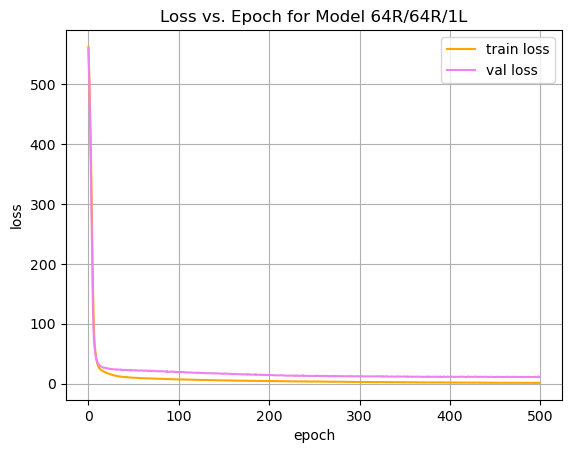

In [13]:
loss_per_epoch = history.history['loss']
val_loss_per_epoch = history.history['val_loss']

plot_train_and_val_quantities(loss_per_epoch, val_loss_per_epoch,
                              "loss",
                              f"Loss vs. Epoch for Model {model.name}")

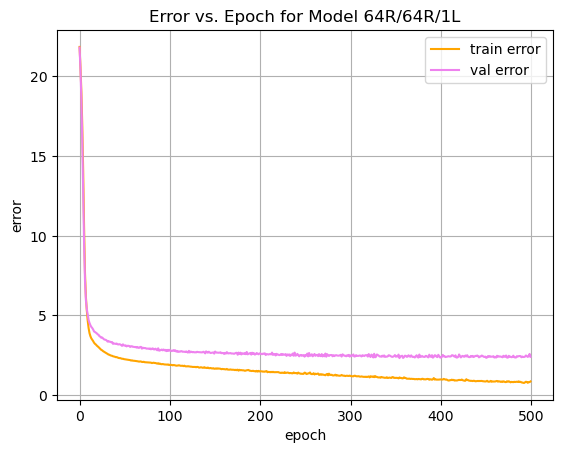

In [14]:
error_per_epoch = history.history['mean_absolute_error']
val_error_per_epoch = history.history['val_mean_absolute_error']

plot_train_and_val_quantities(error_per_epoch, val_error_per_epoch,
                              "mean absolute error",
                              f"Error vs. Epoch for Model {model.name}")

### Helper Function: `print_errors_at_last_epoch`

In [15]:
def print_errors_at_last_epoch(errors, val_errors):
  """Print final values of training and validation errors"""
  assert len(errors) == len(val_errors)
  final_error = errors[-1]
  final_val_error = val_errors[-1]
  print(f"final_error: {final_error}")
  print(f"final val error: {final_val_error}")
  final_val_minus_train = final_val_error - final_error
  print(f"final val - final train: {final_val_minus_train}")

In [16]:
# So where did our training and validation errors end up at end of epochs?
print_errors_at_last_epoch(error_per_epoch, val_error_per_epoch)

final_error: 0.8576314449310303
final val error: 2.4051451683044434
final val - final train: 1.547513723373413


## Eyeball Some Model Predictions

In [17]:
# TODO: Run your model on the test set and see what it predicts.
predictions = model.predict(x_test)
predictions[0:4]

4/4 [==============================] - 0s 1ms/step


array([[ 8.628456],
       [18.80169 ],
       [21.405453],
       [31.679253]], dtype=float32)

### Helper Function: `compare_predictions_with_targets`

In [18]:
def compare_predictions_with_targets(predictions, targets, verbose=False):
  assert len(predictions) == len(targets)
  preds_and_targets = zip(predictions, targets)

  total_absolute_percent_error = 0.0
  num_entries = 0

  for (p,t) in preds_and_targets:
    absolute_percent_error = np.abs( (p-t)/t * 100.0 )
    num_entries += 1
    total_absolute_percent_error += absolute_percent_error
    if verbose:
      print(f"Prediction: {p}, Truth: {t}, Abs. Percent Error: {absolute_percent_error}")

  average_absolute_percent_error = total_absolute_percent_error/num_entries
  print(f"\nAverage Absolute Percentage Error: {average_absolute_percent_error}")

In [19]:
# How'd we do on the first ten predictions?
compare_predictions_with_targets(predictions[:10], y_test[:10], True)

Prediction: [8.628456], Truth: 7.2, Abs. Percent Error: [19.839672]
Prediction: [18.80169], Truth: 18.8, Abs. Percent Error: [0.00898889]
Prediction: [21.405453], Truth: 19.0, Abs. Percent Error: [12.660276]
Prediction: [31.679253], Truth: 27.0, Abs. Percent Error: [17.330564]
Prediction: [23.817991], Truth: 22.2, Abs. Percent Error: [7.288245]
Prediction: [23.632065], Truth: 24.5, Abs. Percent Error: [3.5425928]
Prediction: [29.871878], Truth: 31.2, Abs. Percent Error: [4.2568045]
Prediction: [22.38091], Truth: 22.9, Abs. Percent Error: [2.2667632]
Prediction: [19.535553], Truth: 20.5, Abs. Percent Error: [4.7046194]
Prediction: [22.983013], Truth: 23.2, Abs. Percent Error: [0.9352914]

Average Absolute Percentage Error: [7.2833815]


In [20]:
# And across the whole dataset how did we make out...?
compare_predictions_with_targets(predictions, y_test)


Average Absolute Percentage Error: [12.021755]


## Did We Gain Anything From Having More Layers?

Let's compare the model you just constructed and trained to a simple linear regression model.  Remember that in their heart of hearts, deep neural networks are just about curve fitting, and without nonlinear activations, a deep neural network degenerates into a boring, linear model, as we showed in class with a bit of matrix algebra.

Now, we'll implement plain, old linear regression as a neural network, and see how linear regression does on the data, as compared to the neural network with two hidden layers, each with nonlinear ReLU activations, and each of which is relatively beefy in unit count, compared to the number of input units.

In [21]:
linear_model = Sequential(name="1L")

# The world's most sad and forlorn neural network... Just linear regression
# with an overly ornate version of gradient descent used to train it.
linear_model.add(Dense(1, activation='linear', input_shape=[13]))

linear_model.compile(loss='mean_squared_error',
                     optimizer='adam',
                     metrics=['mean_absolute_error'])

linear_history = linear_model.fit(
                                  x_train, y_train,
                                  validation_data=(x_test, y_test),
                                  epochs=EPOCHS,
                                  batch_size=BATCH_SIZE,
                                  verbose=2,
                                  shuffle=True
                                 )

Epoch 1/500
13/13 - 1s - loss: 579.4277 - mean_absolute_error: 22.3892 - val_loss: 614.5981 - val_mean_absolute_error: 23.2101 - 701ms/epoch - 54ms/step
Epoch 2/500
13/13 - 0s - loss: 578.1183 - mean_absolute_error: 22.3771 - val_loss: 613.0126 - val_mean_absolute_error: 23.1921 - 51ms/epoch - 4ms/step
Epoch 3/500
13/13 - 0s - loss: 576.7637 - mean_absolute_error: 22.3633 - val_loss: 611.4808 - val_mean_absolute_error: 23.1741 - 60ms/epoch - 5ms/step
Epoch 4/500
13/13 - 0s - loss: 575.4828 - mean_absolute_error: 22.3501 - val_loss: 609.9448 - val_mean_absolute_error: 23.1560 - 55ms/epoch - 4ms/step
Epoch 5/500
13/13 - 0s - loss: 574.2522 - mean_absolute_error: 22.3385 - val_loss: 608.4104 - val_mean_absolute_error: 23.1380 - 56ms/epoch - 4ms/step
Epoch 6/500
13/13 - 0s - loss: 572.9219 - mean_absolute_error: 22.3239 - val_loss: 606.9841 - val_mean_absolute_error: 23.1203 - 57ms/epoch - 4ms/step
Epoch 7/500
13/13 - 0s - loss: 571.7061 - mean_absolute_error: 22.3113 - val_loss: 605.4649 

Epoch 55/500
13/13 - 0s - loss: 524.5436 - mean_absolute_error: 21.6936 - val_loss: 548.1682 - val_mean_absolute_error: 22.2888 - 52ms/epoch - 4ms/step
Epoch 56/500
13/13 - 0s - loss: 523.7634 - mean_absolute_error: 21.6815 - val_loss: 547.1923 - val_mean_absolute_error: 22.2726 - 52ms/epoch - 4ms/step
Epoch 57/500
13/13 - 0s - loss: 522.9787 - mean_absolute_error: 21.6685 - val_loss: 546.2277 - val_mean_absolute_error: 22.2567 - 50ms/epoch - 4ms/step
Epoch 58/500
13/13 - 0s - loss: 522.1760 - mean_absolute_error: 21.6552 - val_loss: 545.2912 - val_mean_absolute_error: 22.2411 - 52ms/epoch - 4ms/step
Epoch 59/500
13/13 - 0s - loss: 521.4055 - mean_absolute_error: 21.6429 - val_loss: 544.3358 - val_mean_absolute_error: 22.2253 - 50ms/epoch - 4ms/step
Epoch 60/500
13/13 - 0s - loss: 520.6516 - mean_absolute_error: 21.6304 - val_loss: 543.3613 - val_mean_absolute_error: 22.2090 - 51ms/epoch - 4ms/step
Epoch 61/500
13/13 - 0s - loss: 519.8375 - mean_absolute_error: 21.6168 - val_loss: 542.

Epoch 109/500
13/13 - 0s - loss: 486.2181 - mean_absolute_error: 21.0072 - val_loss: 502.0667 - val_mean_absolute_error: 21.4646 - 52ms/epoch - 4ms/step
Epoch 110/500
13/13 - 0s - loss: 485.5712 - mean_absolute_error: 20.9943 - val_loss: 501.2715 - val_mean_absolute_error: 21.4493 - 54ms/epoch - 4ms/step
Epoch 111/500
13/13 - 0s - loss: 484.9129 - mean_absolute_error: 20.9815 - val_loss: 500.5641 - val_mean_absolute_error: 21.4353 - 52ms/epoch - 4ms/step
Epoch 112/500
13/13 - 0s - loss: 484.2734 - mean_absolute_error: 20.9691 - val_loss: 499.7781 - val_mean_absolute_error: 21.4205 - 51ms/epoch - 4ms/step
Epoch 113/500
13/13 - 0s - loss: 483.6135 - mean_absolute_error: 20.9563 - val_loss: 498.9998 - val_mean_absolute_error: 21.4055 - 53ms/epoch - 4ms/step
Epoch 114/500
13/13 - 0s - loss: 482.9603 - mean_absolute_error: 20.9435 - val_loss: 498.2464 - val_mean_absolute_error: 21.3909 - 52ms/epoch - 4ms/step
Epoch 115/500
13/13 - 0s - loss: 482.3381 - mean_absolute_error: 20.9312 - val_los

Epoch 163/500
13/13 - 0s - loss: 452.6558 - mean_absolute_error: 20.3263 - val_loss: 463.4458 - val_mean_absolute_error: 20.6926 - 54ms/epoch - 4ms/step
Epoch 164/500
13/13 - 0s - loss: 452.0554 - mean_absolute_error: 20.3137 - val_loss: 462.7963 - val_mean_absolute_error: 20.6788 - 57ms/epoch - 4ms/step
Epoch 165/500
13/13 - 0s - loss: 451.4638 - mean_absolute_error: 20.3012 - val_loss: 462.1036 - val_mean_absolute_error: 20.6645 - 71ms/epoch - 5ms/step
Epoch 166/500
13/13 - 0s - loss: 450.8597 - mean_absolute_error: 20.2883 - val_loss: 461.4403 - val_mean_absolute_error: 20.6507 - 52ms/epoch - 4ms/step
Epoch 167/500
13/13 - 0s - loss: 450.2775 - mean_absolute_error: 20.2761 - val_loss: 460.7228 - val_mean_absolute_error: 20.6363 - 55ms/epoch - 4ms/step
Epoch 168/500
13/13 - 0s - loss: 449.6605 - mean_absolute_error: 20.2633 - val_loss: 460.0530 - val_mean_absolute_error: 20.6223 - 68ms/epoch - 5ms/step
Epoch 169/500
13/13 - 0s - loss: 449.0672 - mean_absolute_error: 20.2507 - val_los

Epoch 217/500
13/13 - 0s - loss: 421.5789 - mean_absolute_error: 19.6506 - val_loss: 428.7667 - val_mean_absolute_error: 19.9456 - 52ms/epoch - 4ms/step
Epoch 218/500
13/13 - 0s - loss: 421.0128 - mean_absolute_error: 19.6378 - val_loss: 428.1442 - val_mean_absolute_error: 19.9317 - 56ms/epoch - 4ms/step
Epoch 219/500
13/13 - 0s - loss: 420.4590 - mean_absolute_error: 19.6254 - val_loss: 427.5267 - val_mean_absolute_error: 19.9180 - 53ms/epoch - 4ms/step
Epoch 220/500
13/13 - 0s - loss: 419.9130 - mean_absolute_error: 19.6131 - val_loss: 426.9220 - val_mean_absolute_error: 19.9044 - 56ms/epoch - 4ms/step
Epoch 221/500
13/13 - 0s - loss: 419.3569 - mean_absolute_error: 19.6006 - val_loss: 426.2815 - val_mean_absolute_error: 19.8904 - 52ms/epoch - 4ms/step
Epoch 222/500
13/13 - 0s - loss: 418.7965 - mean_absolute_error: 19.5879 - val_loss: 425.7061 - val_mean_absolute_error: 19.8773 - 56ms/epoch - 4ms/step
Epoch 223/500
13/13 - 0s - loss: 418.2551 - mean_absolute_error: 19.5758 - val_los

Epoch 271/500
13/13 - 0s - loss: 392.4864 - mean_absolute_error: 18.9787 - val_loss: 396.8214 - val_mean_absolute_error: 19.2115 - 50ms/epoch - 4ms/step
Epoch 272/500
13/13 - 0s - loss: 391.9621 - mean_absolute_error: 18.9662 - val_loss: 396.2236 - val_mean_absolute_error: 19.1975 - 54ms/epoch - 4ms/step
Epoch 273/500
13/13 - 0s - loss: 391.4373 - mean_absolute_error: 18.9538 - val_loss: 395.6720 - val_mean_absolute_error: 19.1843 - 52ms/epoch - 4ms/step
Epoch 274/500
13/13 - 0s - loss: 390.9321 - mean_absolute_error: 18.9417 - val_loss: 395.0602 - val_mean_absolute_error: 19.1701 - 52ms/epoch - 4ms/step
Epoch 275/500
13/13 - 0s - loss: 390.4026 - mean_absolute_error: 18.9291 - val_loss: 394.5135 - val_mean_absolute_error: 19.1569 - 53ms/epoch - 4ms/step
Epoch 276/500
13/13 - 0s - loss: 389.8868 - mean_absolute_error: 18.9168 - val_loss: 393.9739 - val_mean_absolute_error: 19.1438 - 57ms/epoch - 4ms/step
Epoch 277/500
13/13 - 0s - loss: 389.3686 - mean_absolute_error: 18.9042 - val_los

Epoch 325/500
13/13 - 0s - loss: 365.1367 - mean_absolute_error: 18.3094 - val_loss: 367.2174 - val_mean_absolute_error: 18.4876 - 51ms/epoch - 4ms/step
Epoch 326/500
13/13 - 0s - loss: 364.6597 - mean_absolute_error: 18.2973 - val_loss: 366.6516 - val_mean_absolute_error: 18.4738 - 52ms/epoch - 4ms/step
Epoch 327/500
13/13 - 0s - loss: 364.1537 - mean_absolute_error: 18.2847 - val_loss: 366.1522 - val_mean_absolute_error: 18.4610 - 52ms/epoch - 4ms/step
Epoch 328/500
13/13 - 0s - loss: 363.6642 - mean_absolute_error: 18.2724 - val_loss: 365.6202 - val_mean_absolute_error: 18.4475 - 51ms/epoch - 4ms/step
Epoch 329/500
13/13 - 0s - loss: 363.1733 - mean_absolute_error: 18.2601 - val_loss: 365.0792 - val_mean_absolute_error: 18.4340 - 51ms/epoch - 4ms/step
Epoch 330/500
13/13 - 0s - loss: 362.6815 - mean_absolute_error: 18.2476 - val_loss: 364.5824 - val_mean_absolute_error: 18.4212 - 56ms/epoch - 4ms/step
Epoch 331/500
13/13 - 0s - loss: 362.1829 - mean_absolute_error: 18.2351 - val_los

Epoch 379/500
13/13 - 0s - loss: 339.3340 - mean_absolute_error: 17.6426 - val_loss: 339.6065 - val_mean_absolute_error: 17.7715 - 53ms/epoch - 4ms/step
Epoch 380/500
13/13 - 0s - loss: 338.8679 - mean_absolute_error: 17.6301 - val_loss: 339.1286 - val_mean_absolute_error: 17.7586 - 55ms/epoch - 4ms/step
Epoch 381/500
13/13 - 0s - loss: 338.4211 - mean_absolute_error: 17.6183 - val_loss: 338.6838 - val_mean_absolute_error: 17.7460 - 53ms/epoch - 4ms/step
Epoch 382/500
13/13 - 0s - loss: 337.9442 - mean_absolute_error: 17.6056 - val_loss: 338.1574 - val_mean_absolute_error: 17.7324 - 62ms/epoch - 5ms/step
Epoch 383/500
13/13 - 0s - loss: 337.4745 - mean_absolute_error: 17.5931 - val_loss: 337.6779 - val_mean_absolute_error: 17.7193 - 53ms/epoch - 4ms/step
Epoch 384/500
13/13 - 0s - loss: 337.0253 - mean_absolute_error: 17.5811 - val_loss: 337.1495 - val_mean_absolute_error: 17.7054 - 56ms/epoch - 4ms/step
Epoch 385/500
13/13 - 0s - loss: 336.5518 - mean_absolute_error: 17.5685 - val_los

Epoch 433/500
13/13 - 0s - loss: 314.9309 - mean_absolute_error: 16.9774 - val_loss: 313.8571 - val_mean_absolute_error: 17.0640 - 51ms/epoch - 4ms/step
Epoch 434/500
13/13 - 0s - loss: 314.4945 - mean_absolute_error: 16.9651 - val_loss: 313.3927 - val_mean_absolute_error: 17.0509 - 53ms/epoch - 4ms/step
Epoch 435/500
13/13 - 0s - loss: 314.0598 - mean_absolute_error: 16.9530 - val_loss: 312.9477 - val_mean_absolute_error: 17.0380 - 51ms/epoch - 4ms/step
Epoch 436/500
13/13 - 0s - loss: 313.6354 - mean_absolute_error: 16.9411 - val_loss: 312.4442 - val_mean_absolute_error: 17.0244 - 53ms/epoch - 4ms/step
Epoch 437/500
13/13 - 0s - loss: 313.2018 - mean_absolute_error: 16.9289 - val_loss: 312.0381 - val_mean_absolute_error: 17.0122 - 52ms/epoch - 4ms/step
Epoch 438/500
13/13 - 0s - loss: 312.7487 - mean_absolute_error: 16.9162 - val_loss: 311.5593 - val_mean_absolute_error: 16.9991 - 53ms/epoch - 4ms/step
Epoch 439/500
13/13 - 0s - loss: 312.3088 - mean_absolute_error: 16.9036 - val_los

Epoch 487/500
13/13 - 0s - loss: 291.8519 - mean_absolute_error: 16.3144 - val_loss: 289.8133 - val_mean_absolute_error: 16.3655 - 54ms/epoch - 4ms/step
Epoch 488/500
13/13 - 0s - loss: 291.4251 - mean_absolute_error: 16.3020 - val_loss: 289.4051 - val_mean_absolute_error: 16.3533 - 51ms/epoch - 4ms/step
Epoch 489/500
13/13 - 0s - loss: 291.0183 - mean_absolute_error: 16.2901 - val_loss: 288.9206 - val_mean_absolute_error: 16.3395 - 52ms/epoch - 4ms/step
Epoch 490/500
13/13 - 0s - loss: 290.5933 - mean_absolute_error: 16.2776 - val_loss: 288.5039 - val_mean_absolute_error: 16.3271 - 53ms/epoch - 4ms/step
Epoch 491/500
13/13 - 0s - loss: 290.1806 - mean_absolute_error: 16.2655 - val_loss: 288.0768 - val_mean_absolute_error: 16.3141 - 51ms/epoch - 4ms/step
Epoch 492/500
13/13 - 0s - loss: 289.7565 - mean_absolute_error: 16.2529 - val_loss: 287.6416 - val_mean_absolute_error: 16.3012 - 51ms/epoch - 4ms/step
Epoch 493/500
13/13 - 0s - loss: 289.3493 - mean_absolute_error: 16.2407 - val_los

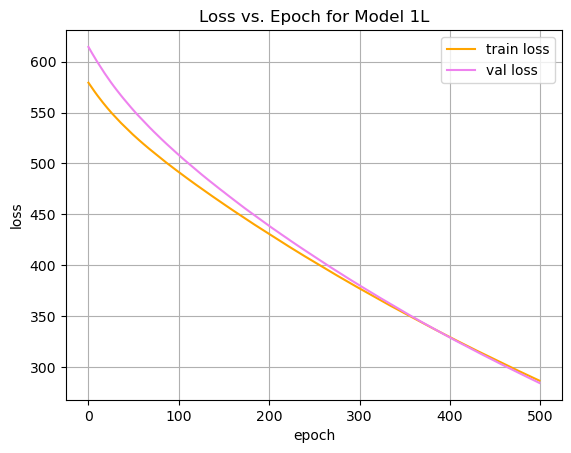

In [22]:
linear_loss_per_epoch = linear_history.history['loss']
linear_val_loss_per_epoch = linear_history.history['val_loss']

plot_train_and_val_quantities(linear_loss_per_epoch, linear_val_loss_per_epoch,
                              "loss",
                              f"Loss vs. Epoch for Model {linear_model.name}")

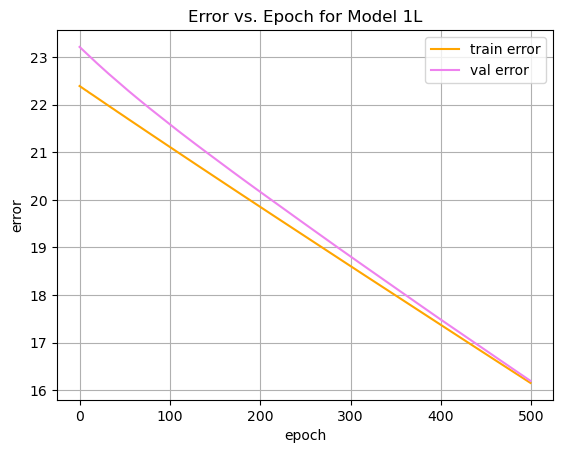

In [23]:
linear_mae_per_epoch = linear_history.history['mean_absolute_error']
linear_val_mae_per_epoch = linear_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(linear_mae_per_epoch, linear_val_mae_per_epoch,
                              "error",
                              f"Error vs. Epoch for Model {linear_model.name}")

In [24]:
print_errors_at_last_epoch(linear_mae_per_epoch, linear_val_mae_per_epoch)

final_error: 16.155080795288086
final val error: 16.198095321655273
final val - final train: 0.0430145263671875


In [25]:
# Now see how our linear regression model did...
linear_predictions = linear_model.predict(x_test)

compare_predictions_with_targets(linear_predictions, y_test)

4/4 [==============================] - 0s 1ms/step

Average Absolute Percentage Error: [78.36029]


## QUESTION: Comparing the Neural Net to Vanilla Linear Regression

1. What average absolute percentage error did you get, over all the samples for the deep model?
1. What average absolute percentage error did you get, over all samples for the linear model, which lacked any hidden layers?
1. Does it seem to you that the relatively small neural network has more model capacity than a straightforward linear regression? Where do you think this greater model capacity is coming from?


# Improving Performance with Regularization

Make a note of the errors you saw on training and test for the neural network you first trained, above.  You'll now try to do better by applying some of the regularization techniques discussed in class.

## L2 Regularization

In [26]:
from tensorflow.keras.regularizers import l2

l2_reg_model = Sequential(name="64R-L2/64R-L2/1L-L2")
kernel_reg_l2 = l2(0.1)

l2_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg_l2,  # TODO: Use l2 with lambda = 0.1
                  bias_regularizer=kernel_reg_l2,    # TODO: Use l2 with lambda = 0.1
                  input_shape=[13]))

l2_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg_l2,  # TODO: Use l2 with lambda = 0.1
                  bias_regularizer=kernel_reg_l2)),  # TODO: Use l2 with lambda = 0.1

l2_reg_model.add(Dense(1, activation='linear',
                       kernel_regularizer=kernel_reg_l2, # TODO: Use l2 with lambda = 0.1
                       bias_regularizer=kernel_reg_l2))  # TODO: Use l2 with lambda = 0.1

In [27]:
# TODO: Compile the L2-regularized model with the same settings you used before...
l2_reg_model.compile(loss='mean_squared_error',
                     optimizer='adam',
                     metrics=['mean_absolute_error'])

# TODO: Fit the L2-regularized model as you did before...
l2_reg_history = l2_reg_model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))


Epoch 1/500
13/13 [==============================] - 1s 17ms/step - loss: 566.3513 - mean_absolute_error: 21.7267 - val_loss: 565.3404 - val_mean_absolute_error: 21.7563
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 511.2888 - mean_absolute_error: 20.4306 - val_loss: 497.0059 - val_mean_absolute_error: 20.1638
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 432.1761 - mean_absolute_error: 18.4608 - val_loss: 395.9360 - val_mean_absolute_error: 17.5921
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 324.2447 - mean_absolute_error: 15.4496 - val_loss: 265.7529 - val_mean_absolute_error: 13.8927
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 200.5853 - mean_absolute_error: 11.2869 - val_loss: 147.1306 - val_mean_absolute_error: 9.6620
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 110.5191 - mean_absolute_error: 7.5618 - val_loss: 90.0149 - val_mean_absolute_err

13/13 [==============================] - 0s 5ms/step - loss: 18.1031 - mean_absolute_error: 2.1848 - val_loss: 31.3543 - val_mean_absolute_error: 3.1209
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 18.0131 - mean_absolute_error: 2.1833 - val_loss: 31.4737 - val_mean_absolute_error: 3.1317
Epoch 52/500
13/13 [==============================] - 0s 5ms/step - loss: 17.8311 - mean_absolute_error: 2.1700 - val_loss: 31.3647 - val_mean_absolute_error: 3.1388
Epoch 53/500
13/13 [==============================] - 0s 5ms/step - loss: 17.7281 - mean_absolute_error: 2.1633 - val_loss: 31.1288 - val_mean_absolute_error: 3.1284
Epoch 54/500
13/13 [==============================] - 0s 5ms/step - loss: 17.6816 - mean_absolute_error: 2.1682 - val_loss: 31.1448 - val_mean_absolute_error: 3.1217
Epoch 55/500
13/13 [==============================] - 0s 6ms/step - loss: 17.5164 - mean_absolute_error: 2.1548 - val_loss: 30.8005 - val_mean_absolute_error: 3.0754
Epoch 56/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 14.0536 - mean_absolute_error: 1.9366 - val_loss: 26.6648 - val_mean_absolute_error: 2.8451
Epoch 100/500
13/13 [==============================] - 0s 6ms/step - loss: 13.8971 - mean_absolute_error: 1.9325 - val_loss: 27.5359 - val_mean_absolute_error: 2.9403
Epoch 101/500
13/13 [==============================] - 0s 5ms/step - loss: 13.8653 - mean_absolute_error: 1.9318 - val_loss: 27.0560 - val_mean_absolute_error: 2.8919
Epoch 102/500
13/13 [==============================] - 0s 5ms/step - loss: 13.9998 - mean_absolute_error: 1.9253 - val_loss: 26.3382 - val_mean_absolute_error: 2.8692
Epoch 103/500
13/13 [==============================] - 0s 5ms/step - loss: 14.1477 - mean_absolute_error: 1.9763 - val_loss: 27.9164 - val_mean_absolute_error: 2.9397
Epoch 104/500
13/13 [==============================] - 0s 5ms/step - loss: 13.7932 - mean_absolute_error: 1.9117 - val_loss: 26.0503 - val_mean_absolute_error: 2.8455
Epoch 105/50

13/13 [==============================] - 0s 5ms/step - loss: 12.2207 - mean_absolute_error: 1.8549 - val_loss: 24.6943 - val_mean_absolute_error: 2.8075
Epoch 149/500
13/13 [==============================] - 0s 5ms/step - loss: 12.0148 - mean_absolute_error: 1.8182 - val_loss: 23.8210 - val_mean_absolute_error: 2.7032
Epoch 150/500
13/13 [==============================] - 0s 6ms/step - loss: 12.0631 - mean_absolute_error: 1.8118 - val_loss: 24.3895 - val_mean_absolute_error: 2.7753
Epoch 151/500
13/13 [==============================] - 0s 5ms/step - loss: 12.0205 - mean_absolute_error: 1.8173 - val_loss: 23.8159 - val_mean_absolute_error: 2.7346
Epoch 152/500
13/13 [==============================] - 0s 5ms/step - loss: 11.9166 - mean_absolute_error: 1.7935 - val_loss: 24.0136 - val_mean_absolute_error: 2.7446
Epoch 153/500
13/13 [==============================] - 0s 5ms/step - loss: 11.9355 - mean_absolute_error: 1.7953 - val_loss: 23.5443 - val_mean_absolute_error: 2.7265
Epoch 154/50

13/13 [==============================] - 0s 5ms/step - loss: 11.2974 - mean_absolute_error: 1.7732 - val_loss: 21.9145 - val_mean_absolute_error: 2.6241
Epoch 198/500
13/13 [==============================] - 0s 6ms/step - loss: 10.9785 - mean_absolute_error: 1.7473 - val_loss: 23.0887 - val_mean_absolute_error: 2.7316
Epoch 199/500
13/13 [==============================] - 0s 5ms/step - loss: 11.0692 - mean_absolute_error: 1.7465 - val_loss: 21.8823 - val_mean_absolute_error: 2.6315
Epoch 200/500
13/13 [==============================] - 0s 6ms/step - loss: 11.0104 - mean_absolute_error: 1.7635 - val_loss: 22.8322 - val_mean_absolute_error: 2.7273
Epoch 201/500
13/13 [==============================] - 0s 5ms/step - loss: 11.0877 - mean_absolute_error: 1.7571 - val_loss: 22.2047 - val_mean_absolute_error: 2.6534
Epoch 202/500
13/13 [==============================] - 0s 5ms/step - loss: 10.8284 - mean_absolute_error: 1.7374 - val_loss: 23.2883 - val_mean_absolute_error: 2.7453
Epoch 203/50

13/13 [==============================] - 0s 5ms/step - loss: 10.3279 - mean_absolute_error: 1.7037 - val_loss: 21.4790 - val_mean_absolute_error: 2.6076
Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 10.4370 - mean_absolute_error: 1.7455 - val_loss: 22.2285 - val_mean_absolute_error: 2.7451
Epoch 248/500
13/13 [==============================] - 0s 5ms/step - loss: 10.3170 - mean_absolute_error: 1.7097 - val_loss: 21.6369 - val_mean_absolute_error: 2.6803
Epoch 249/500
13/13 [==============================] - 0s 5ms/step - loss: 10.3553 - mean_absolute_error: 1.6979 - val_loss: 21.6663 - val_mean_absolute_error: 2.6808
Epoch 250/500
13/13 [==============================] - 0s 5ms/step - loss: 10.2951 - mean_absolute_error: 1.7060 - val_loss: 21.6032 - val_mean_absolute_error: 2.6613
Epoch 251/500
13/13 [==============================] - 0s 6ms/step - loss: 10.4519 - mean_absolute_error: 1.7047 - val_loss: 21.8027 - val_mean_absolute_error: 2.6568
Epoch 252/50

13/13 [==============================] - 0s 5ms/step - loss: 9.8741 - mean_absolute_error: 1.6567 - val_loss: 20.9532 - val_mean_absolute_error: 2.6317
Epoch 296/500
13/13 [==============================] - 0s 5ms/step - loss: 10.0172 - mean_absolute_error: 1.6698 - val_loss: 21.0166 - val_mean_absolute_error: 2.6439
Epoch 297/500
13/13 [==============================] - 0s 5ms/step - loss: 9.8338 - mean_absolute_error: 1.6584 - val_loss: 21.2926 - val_mean_absolute_error: 2.6017
Epoch 298/500
13/13 [==============================] - 0s 5ms/step - loss: 9.9238 - mean_absolute_error: 1.6609 - val_loss: 20.5717 - val_mean_absolute_error: 2.5998
Epoch 299/500
13/13 [==============================] - 0s 6ms/step - loss: 9.9966 - mean_absolute_error: 1.6701 - val_loss: 20.9630 - val_mean_absolute_error: 2.5792
Epoch 300/500
13/13 [==============================] - 0s 5ms/step - loss: 9.9000 - mean_absolute_error: 1.6611 - val_loss: 21.3183 - val_mean_absolute_error: 2.6383
Epoch 301/500
13/

13/13 [==============================] - 0s 5ms/step - loss: 9.6545 - mean_absolute_error: 1.6553 - val_loss: 20.8437 - val_mean_absolute_error: 2.5812
Epoch 345/500
13/13 [==============================] - 0s 5ms/step - loss: 9.6194 - mean_absolute_error: 1.6351 - val_loss: 20.2897 - val_mean_absolute_error: 2.5731
Epoch 346/500
13/13 [==============================] - 0s 5ms/step - loss: 9.6237 - mean_absolute_error: 1.6389 - val_loss: 21.0393 - val_mean_absolute_error: 2.5787
Epoch 347/500
13/13 [==============================] - 0s 5ms/step - loss: 9.6117 - mean_absolute_error: 1.6319 - val_loss: 20.5536 - val_mean_absolute_error: 2.5549
Epoch 348/500
13/13 [==============================] - 0s 5ms/step - loss: 9.7398 - mean_absolute_error: 1.6757 - val_loss: 21.3193 - val_mean_absolute_error: 2.6653
Epoch 349/500
13/13 [==============================] - 0s 5ms/step - loss: 9.6541 - mean_absolute_error: 1.6333 - val_loss: 20.2824 - val_mean_absolute_error: 2.5812
Epoch 350/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 9.4335 - mean_absolute_error: 1.6083 - val_loss: 20.0515 - val_mean_absolute_error: 2.5514
Epoch 394/500
13/13 [==============================] - 0s 6ms/step - loss: 9.4950 - mean_absolute_error: 1.6441 - val_loss: 20.7981 - val_mean_absolute_error: 2.5433
Epoch 395/500
13/13 [==============================] - 0s 5ms/step - loss: 9.3886 - mean_absolute_error: 1.6207 - val_loss: 20.5621 - val_mean_absolute_error: 2.5791
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 9.3184 - mean_absolute_error: 1.5827 - val_loss: 20.4921 - val_mean_absolute_error: 2.5357
Epoch 397/500
13/13 [==============================] - 0s 5ms/step - loss: 9.3798 - mean_absolute_error: 1.6175 - val_loss: 20.5536 - val_mean_absolute_error: 2.5273
Epoch 398/500
13/13 [==============================] - 0s 6ms/step - loss: 9.3038 - mean_absolute_error: 1.5957 - val_loss: 20.5974 - val_mean_absolute_error: 2.5659
Epoch 399/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 9.1560 - mean_absolute_error: 1.5839 - val_loss: 20.6930 - val_mean_absolute_error: 2.6018
Epoch 443/500
13/13 [==============================] - 0s 6ms/step - loss: 9.2023 - mean_absolute_error: 1.5786 - val_loss: 20.3491 - val_mean_absolute_error: 2.5254
Epoch 444/500
13/13 [==============================] - 0s 5ms/step - loss: 9.1637 - mean_absolute_error: 1.5672 - val_loss: 20.3364 - val_mean_absolute_error: 2.5704
Epoch 445/500
13/13 [==============================] - 0s 5ms/step - loss: 9.1890 - mean_absolute_error: 1.5686 - val_loss: 20.1934 - val_mean_absolute_error: 2.5151
Epoch 446/500
13/13 [==============================] - 0s 5ms/step - loss: 9.2439 - mean_absolute_error: 1.5948 - val_loss: 21.0753 - val_mean_absolute_error: 2.5915
Epoch 447/500
13/13 [==============================] - 0s 5ms/step - loss: 9.2194 - mean_absolute_error: 1.5909 - val_loss: 20.3884 - val_mean_absolute_error: 2.5539
Epoch 448/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 9.2242 - mean_absolute_error: 1.5796 - val_loss: 20.2182 - val_mean_absolute_error: 2.5267
Epoch 492/500
13/13 [==============================] - 0s 5ms/step - loss: 9.1364 - mean_absolute_error: 1.5683 - val_loss: 21.2163 - val_mean_absolute_error: 2.5935
Epoch 493/500
13/13 [==============================] - 0s 6ms/step - loss: 9.0488 - mean_absolute_error: 1.5492 - val_loss: 20.4643 - val_mean_absolute_error: 2.5462
Epoch 494/500
13/13 [==============================] - 0s 5ms/step - loss: 9.1440 - mean_absolute_error: 1.5705 - val_loss: 20.5709 - val_mean_absolute_error: 2.5131
Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 9.4832 - mean_absolute_error: 1.6165 - val_loss: 21.2877 - val_mean_absolute_error: 2.6470
Epoch 496/500
13/13 [==============================] - 0s 5ms/step - loss: 9.2458 - mean_absolute_error: 1.6049 - val_loss: 21.1122 - val_mean_absolute_error: 2.6202
Epoch 497/500
13/1

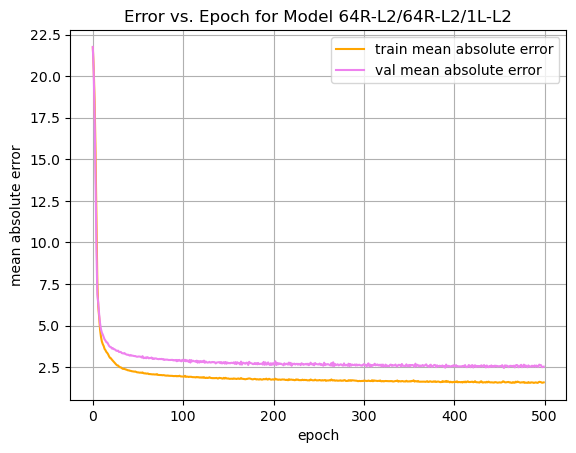

In [28]:
l2_error = l2_reg_history.history['mean_absolute_error']
l2_val_error = l2_reg_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(l2_error, l2_val_error,
                              "mean absolute error",
                              f"Error vs. Epoch for Model {l2_reg_model.name}")

In [29]:
print_errors_at_last_epoch(l2_error, l2_val_error)

final_error: 1.579967975616455
final val error: 2.526160478591919
final val - final train: 0.9461925029754639


## Dropout Regularization

In [30]:
from tensorflow.keras.layers import Dropout # Note we do Dropout by inserting a special layer!
                                            # This is different from how we added kernel and bias
                                            # regularizaers *to* existing layers themselves above.

dropout_model = Sequential(name="64R-D/64R-D/1L")

dropout_model.add(Dense(64, activation='relu', input_shape=(13,)))
dropout_model.add(Dropout(0.2)) # TODO: Add a Dropout layer with rate 0.20
dropout_model.add(Dense(64, activation='relu'))
dropout_model.add(Dropout(0.2)) # TODO: Add a Dropout layer with rate 0.20
dropout_model.add(Dense(1, activation='linear')) # NOTE: no dropout here... think why?

In [31]:
# TODO: Compile the Dropout-regularized model as you did before...
dropout_model.compile(loss='mean_squared_error',
                     optimizer='adam',
                     metrics=['mean_absolute_error'])

# TODO: Fit the Dropout-regularized model as you did before...
dropout_history = dropout_model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))


Epoch 1/500
13/13 [==============================] - 1s 15ms/step - loss: 537.5286 - mean_absolute_error: 21.3534 - val_loss: 528.5253 - val_mean_absolute_error: 21.1817
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 465.6127 - mean_absolute_error: 19.6387 - val_loss: 448.5126 - val_mean_absolute_error: 19.2555
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 381.4247 - mean_absolute_error: 17.4523 - val_loss: 344.0518 - val_mean_absolute_error: 16.4952
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 269.1961 - mean_absolute_error: 14.3395 - val_loss: 225.0403 - val_mean_absolute_error: 12.9514
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 162.0364 - mean_absolute_error: 10.4154 - val_loss: 126.2392 - val_mean_absolute_error: 9.4631
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 96.7842 - mean_absolute_error: 7.7095 - val_loss: 78.7424 - val_mean_absolute_erro

13/13 [==============================] - 0s 5ms/step - loss: 19.0855 - mean_absolute_error: 3.1878 - val_loss: 21.6777 - val_mean_absolute_error: 3.1221
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 19.2277 - mean_absolute_error: 3.2727 - val_loss: 22.3288 - val_mean_absolute_error: 3.1279
Epoch 52/500
13/13 [==============================] - 0s 5ms/step - loss: 18.1403 - mean_absolute_error: 3.2469 - val_loss: 22.7850 - val_mean_absolute_error: 3.2084
Epoch 53/500
13/13 [==============================] - 0s 5ms/step - loss: 17.6371 - mean_absolute_error: 3.0137 - val_loss: 22.5787 - val_mean_absolute_error: 3.1862
Epoch 54/500
13/13 [==============================] - 0s 5ms/step - loss: 18.7771 - mean_absolute_error: 3.1480 - val_loss: 22.4764 - val_mean_absolute_error: 3.2222
Epoch 55/500
13/13 [==============================] - 0s 5ms/step - loss: 16.8260 - mean_absolute_error: 3.0180 - val_loss: 20.8282 - val_mean_absolute_error: 3.0694
Epoch 56/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 14.8279 - mean_absolute_error: 2.8749 - val_loss: 20.4860 - val_mean_absolute_error: 3.0195
Epoch 100/500
13/13 [==============================] - 0s 5ms/step - loss: 17.4924 - mean_absolute_error: 3.1429 - val_loss: 19.4519 - val_mean_absolute_error: 2.8349
Epoch 101/500
13/13 [==============================] - 0s 6ms/step - loss: 15.2656 - mean_absolute_error: 2.9802 - val_loss: 19.8807 - val_mean_absolute_error: 2.8693
Epoch 102/500
13/13 [==============================] - 0s 5ms/step - loss: 16.6550 - mean_absolute_error: 2.9985 - val_loss: 19.7485 - val_mean_absolute_error: 2.9103
Epoch 103/500
13/13 [==============================] - 0s 5ms/step - loss: 16.5776 - mean_absolute_error: 2.9958 - val_loss: 19.3706 - val_mean_absolute_error: 2.8565
Epoch 104/500
13/13 [==============================] - 0s 5ms/step - loss: 14.9914 - mean_absolute_error: 2.8753 - val_loss: 19.3786 - val_mean_absolute_error: 2.8963
Epoch 105/50

13/13 [==============================] - 0s 5ms/step - loss: 14.8928 - mean_absolute_error: 2.8728 - val_loss: 21.0387 - val_mean_absolute_error: 3.1591
Epoch 149/500
13/13 [==============================] - 0s 5ms/step - loss: 14.9948 - mean_absolute_error: 2.9639 - val_loss: 18.9056 - val_mean_absolute_error: 2.7796
Epoch 150/500
13/13 [==============================] - 0s 5ms/step - loss: 14.4433 - mean_absolute_error: 2.9124 - val_loss: 18.6127 - val_mean_absolute_error: 2.8373
Epoch 151/500
13/13 [==============================] - 0s 5ms/step - loss: 14.4222 - mean_absolute_error: 2.8927 - val_loss: 18.1211 - val_mean_absolute_error: 2.8059
Epoch 152/500
13/13 [==============================] - 0s 5ms/step - loss: 14.3889 - mean_absolute_error: 2.7197 - val_loss: 19.2392 - val_mean_absolute_error: 2.9776
Epoch 153/500
13/13 [==============================] - 0s 5ms/step - loss: 16.7127 - mean_absolute_error: 2.9517 - val_loss: 18.1677 - val_mean_absolute_error: 2.7311
Epoch 154/50

13/13 [==============================] - 0s 5ms/step - loss: 16.8507 - mean_absolute_error: 3.0410 - val_loss: 18.5075 - val_mean_absolute_error: 2.8715
Epoch 198/500
13/13 [==============================] - 0s 5ms/step - loss: 16.1960 - mean_absolute_error: 2.8622 - val_loss: 17.8739 - val_mean_absolute_error: 2.7300
Epoch 199/500
13/13 [==============================] - 0s 5ms/step - loss: 14.0020 - mean_absolute_error: 2.8367 - val_loss: 16.7951 - val_mean_absolute_error: 2.6398
Epoch 200/500
13/13 [==============================] - 0s 5ms/step - loss: 13.2685 - mean_absolute_error: 2.7826 - val_loss: 17.9503 - val_mean_absolute_error: 2.8663
Epoch 201/500
13/13 [==============================] - 0s 5ms/step - loss: 12.0777 - mean_absolute_error: 2.6439 - val_loss: 17.3479 - val_mean_absolute_error: 2.6570
Epoch 202/500
13/13 [==============================] - 0s 5ms/step - loss: 12.4226 - mean_absolute_error: 2.6003 - val_loss: 19.0982 - val_mean_absolute_error: 2.9009
Epoch 203/50

13/13 [==============================] - 0s 5ms/step - loss: 11.7176 - mean_absolute_error: 2.5838 - val_loss: 17.8663 - val_mean_absolute_error: 2.8175
Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 12.0624 - mean_absolute_error: 2.5410 - val_loss: 16.2650 - val_mean_absolute_error: 2.5703
Epoch 248/500
13/13 [==============================] - 0s 5ms/step - loss: 13.9435 - mean_absolute_error: 2.7864 - val_loss: 17.5987 - val_mean_absolute_error: 2.8143
Epoch 249/500
13/13 [==============================] - 0s 5ms/step - loss: 13.2291 - mean_absolute_error: 2.7142 - val_loss: 16.3202 - val_mean_absolute_error: 2.6366
Epoch 250/500
13/13 [==============================] - 0s 5ms/step - loss: 14.0106 - mean_absolute_error: 2.8029 - val_loss: 16.1153 - val_mean_absolute_error: 2.5530
Epoch 251/500
13/13 [==============================] - 0s 5ms/step - loss: 13.4012 - mean_absolute_error: 2.6583 - val_loss: 17.8343 - val_mean_absolute_error: 2.8258
Epoch 252/50

13/13 [==============================] - 0s 5ms/step - loss: 11.8989 - mean_absolute_error: 2.5429 - val_loss: 15.9175 - val_mean_absolute_error: 2.6413
Epoch 296/500
13/13 [==============================] - 0s 5ms/step - loss: 11.3133 - mean_absolute_error: 2.5509 - val_loss: 16.7301 - val_mean_absolute_error: 2.7355
Epoch 297/500
13/13 [==============================] - 0s 5ms/step - loss: 11.5856 - mean_absolute_error: 2.5354 - val_loss: 16.8246 - val_mean_absolute_error: 2.7532
Epoch 298/500
13/13 [==============================] - 0s 5ms/step - loss: 12.2448 - mean_absolute_error: 2.6409 - val_loss: 15.2329 - val_mean_absolute_error: 2.5261
Epoch 299/500
13/13 [==============================] - 0s 6ms/step - loss: 10.8612 - mean_absolute_error: 2.4660 - val_loss: 15.7543 - val_mean_absolute_error: 2.6186
Epoch 300/500
13/13 [==============================] - 0s 5ms/step - loss: 11.6584 - mean_absolute_error: 2.5898 - val_loss: 16.5646 - val_mean_absolute_error: 2.6118
Epoch 301/50

13/13 [==============================] - 0s 5ms/step - loss: 10.9643 - mean_absolute_error: 2.4499 - val_loss: 15.0904 - val_mean_absolute_error: 2.5600
Epoch 345/500
13/13 [==============================] - 0s 5ms/step - loss: 11.6803 - mean_absolute_error: 2.6013 - val_loss: 15.5991 - val_mean_absolute_error: 2.6239
Epoch 346/500
13/13 [==============================] - 0s 5ms/step - loss: 10.5815 - mean_absolute_error: 2.4528 - val_loss: 15.9345 - val_mean_absolute_error: 2.5910
Epoch 347/500
13/13 [==============================] - 0s 6ms/step - loss: 9.7397 - mean_absolute_error: 2.3720 - val_loss: 17.2323 - val_mean_absolute_error: 2.7646
Epoch 348/500
13/13 [==============================] - 0s 5ms/step - loss: 11.4512 - mean_absolute_error: 2.4381 - val_loss: 15.9638 - val_mean_absolute_error: 2.6670
Epoch 349/500
13/13 [==============================] - 0s 6ms/step - loss: 11.1270 - mean_absolute_error: 2.4063 - val_loss: 16.3397 - val_mean_absolute_error: 2.6137
Epoch 350/500

13/13 [==============================] - 0s 5ms/step - loss: 9.3976 - mean_absolute_error: 2.3192 - val_loss: 13.8243 - val_mean_absolute_error: 2.5077
Epoch 394/500
13/13 [==============================] - 0s 5ms/step - loss: 11.2772 - mean_absolute_error: 2.5148 - val_loss: 14.0961 - val_mean_absolute_error: 2.5735
Epoch 395/500
13/13 [==============================] - 0s 6ms/step - loss: 11.1184 - mean_absolute_error: 2.4991 - val_loss: 12.9053 - val_mean_absolute_error: 2.3927
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 9.5061 - mean_absolute_error: 2.2098 - val_loss: 13.6362 - val_mean_absolute_error: 2.4773
Epoch 397/500
13/13 [==============================] - 0s 5ms/step - loss: 10.1090 - mean_absolute_error: 2.4617 - val_loss: 13.8417 - val_mean_absolute_error: 2.4781
Epoch 398/500
13/13 [==============================] - 0s 6ms/step - loss: 11.7253 - mean_absolute_error: 2.4938 - val_loss: 14.3657 - val_mean_absolute_error: 2.5327
Epoch 399/500


13/13 [==============================] - 0s 5ms/step - loss: 10.4202 - mean_absolute_error: 2.4256 - val_loss: 13.5519 - val_mean_absolute_error: 2.4814
Epoch 443/500
13/13 [==============================] - 0s 5ms/step - loss: 11.4719 - mean_absolute_error: 2.4647 - val_loss: 14.2217 - val_mean_absolute_error: 2.5241
Epoch 444/500
13/13 [==============================] - 0s 5ms/step - loss: 10.9458 - mean_absolute_error: 2.4346 - val_loss: 14.6052 - val_mean_absolute_error: 2.6601
Epoch 445/500
13/13 [==============================] - 0s 7ms/step - loss: 9.6727 - mean_absolute_error: 2.2930 - val_loss: 13.7407 - val_mean_absolute_error: 2.4932
Epoch 446/500
13/13 [==============================] - 0s 5ms/step - loss: 9.9300 - mean_absolute_error: 2.3312 - val_loss: 14.9780 - val_mean_absolute_error: 2.6452
Epoch 447/500
13/13 [==============================] - 0s 5ms/step - loss: 9.0094 - mean_absolute_error: 2.2806 - val_loss: 13.9737 - val_mean_absolute_error: 2.4832
Epoch 448/500
1

13/13 [==============================] - 0s 5ms/step - loss: 9.9051 - mean_absolute_error: 2.2735 - val_loss: 15.6533 - val_mean_absolute_error: 2.5965
Epoch 492/500
13/13 [==============================] - 0s 5ms/step - loss: 10.8014 - mean_absolute_error: 2.3899 - val_loss: 16.7721 - val_mean_absolute_error: 2.7390
Epoch 493/500
13/13 [==============================] - 0s 6ms/step - loss: 10.5120 - mean_absolute_error: 2.3878 - val_loss: 16.9389 - val_mean_absolute_error: 2.8150
Epoch 494/500
13/13 [==============================] - 0s 6ms/step - loss: 10.6200 - mean_absolute_error: 2.4355 - val_loss: 13.8159 - val_mean_absolute_error: 2.4454
Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 10.8752 - mean_absolute_error: 2.4484 - val_loss: 14.3793 - val_mean_absolute_error: 2.5506
Epoch 496/500
13/13 [==============================] - 0s 5ms/step - loss: 11.0172 - mean_absolute_error: 2.4856 - val_loss: 14.7061 - val_mean_absolute_error: 2.5523
Epoch 497/500

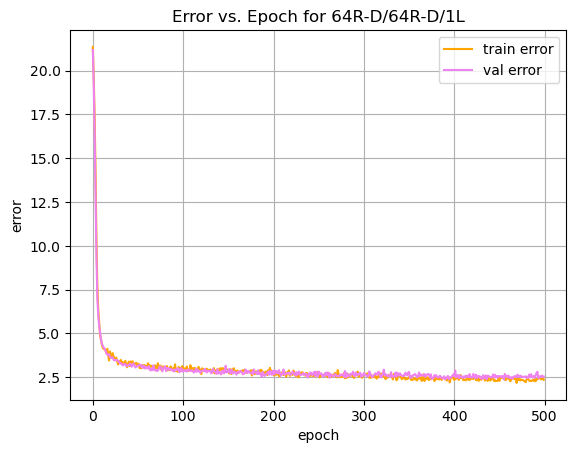

In [32]:
dropout_error = dropout_history.history['mean_absolute_error']
dropout_val_error = dropout_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(dropout_error, dropout_val_error,
                              "mean absolute error",
                              f"Error vs. Epoch for {dropout_model.name}")

In [33]:
print_errors_at_last_epoch(dropout_error, dropout_val_error)

final_error: 2.3555586338043213
final val error: 2.541067123413086
final val - final train: 0.18550848960876465


## QUESTION: Comparing L2 and Dropout Regularization

Compare your plots for the deep network when you ran it without regularization, with L2 regularization, and with dropout regularization.

1. How do the three scenarios compare in terms of how their training error trends develop, and where there training errors land by the end of the 500th epoch?
All 3 scenarios did pretty similarly. Dropout training error ended up being higher than the other two scenarios by the end of the 500th epoch.
1. Which of the three scenarios had the best training error?
The first scenario without regularization or dropout.
1. Which of the three scenarios seems to generalize best to the validation data?
They all did pretty similarly. The first scenario without regularizatio or dropout did better by 0.1.
1. For the scenario that generalizes best to the validation data, how does its training error compare to the best training error of the trio?
The training error for the first scenario does well when compared to the other training errors while also performing better on validation data.
1. Based on the performance of the three methods you've seen so far, which regularization technique would you decide to use?
I have only added l1 regularizer on here, but I tested with l1, l2 and l1_l2. l2 performed the best, I didn't include l1_l2 because it performed the worst of the 3 regularizers. But it looks like the scenrio with regularizer or dropout works the best.


# Now, a Freestyle Exercise, to Try to Do Better Yourself

You've now prepared the Boston housing data for feeding to a neural network and trained and evaluated three models on it.

1. A network with two hidden layers that have ReLU activations.
2. A network without any hidden layers, i.e. a traditional linear regression.
3. The first network, regularized with the L2 penalty.
4. The first network, regularized using Dropout.

For this exercise, create three networks of your own and evaluate them along the lines we did above.  See how low you can get the training error and and how close together you can get the training and test error curves to come, i.e. reduce the overfitting.

Things you might try:

1. Increasing the number of units in one or more of the hidden layers.
2. Adding an additional hidden layer.
3. Trying different regularization techniques (you're free to stick to the two we've studied in this assignment) on your layers, and/or changing the parameters for a regularizer such as $\lambda$ for the $L_2$ scheme or the dropout probability for dropout.

Make plots of your errors akin to what you produced above and summarize your results in a table that looks something like the following, where we've already filled in the names, structures, and regularization methods for the networks we did above.  You should add the training and test errors you computed for them to the table yourself.  Then finish up by writing in the structures for the three freestyle neural networks you tried out and their particulars and performance.

As you work and try things out, try to think through how the things you're
changing in your experiments are affecting the model's ability to get a low
training error, and its ability to generalize to previously unseen test data.

Note that for a more mature approach to the problem, we really should have set aside separate validation samples, which we use for comparing the different models against one another, and a withheld test set that we use for measuring the performance of our final, selected model.  With a dataset as small as the Boston housing data, doing so might be a bit hard, though $k$-fold cross validation might help us.  I'm assuming you guys have studied the ideas of validation vs. test sets, and $k$-fold cross validation in the prior quarters of the program, but _if you have not, please bring it to my attention on Piazza and we'll set aside some specific time to talk about those things in class._. Indeed, even if you just want a review of those things, let me know.

|Name      |Structure |Regularization|Training Error|Test Error|
|----------|----------|--------------|--------------|----------|
|64R/64R/1L| 64/64/1  | None         |0.8          |2.4      |
|        1L| 1        | None         |16.15          |16.2     |
|64R-L2/64R-L2/1L-L2| 64/64/1        | L2        |1.6          |2.5      |
|64R-D/64R-D/1L|64/64/1 | Dropout | 2.3 | 2.5 |
|64R-L2/64R-L2/1L-L2|64/64/1 | L1 | 1.9 | 2.8 |
|64R-L2/64R-L2/1L-L2|64/64/1 | L2 | 2.2 | 3.3 |
|64R-L2/64R-L2/32-L2/1L-L2|64/64/32/1 | L2 | 1.7 | 2.6 |


In [34]:
# TODO: Your first new neural net for the problem
# Updating regularizer to L1
from tensorflow.keras.regularizers import l1

l1_reg_model = Sequential(name="64R-L1/64R-L1/1L-L1")
kernel_reg = l1(0.1)

l1_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg,
                  input_shape=[13]))

l1_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg)),

l1_reg_model.add(Dense(1, activation='linear',
                       kernel_regularizer=kernel_reg,
                       bias_regularizer=kernel_reg))

l1_reg_model.compile(loss='mean_squared_error',
                     optimizer='adam',
                     metrics=['mean_absolute_error'])

l1_reg_history = l1_reg_model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))

Epoch 1/500
13/13 [==============================] - 1s 17ms/step - loss: 626.3990 - mean_absolute_error: 22.0678 - val_loss: 622.8439 - val_mean_absolute_error: 22.0296
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 566.3751 - mean_absolute_error: 20.6806 - val_loss: 555.6042 - val_mean_absolute_error: 20.4819
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 492.8214 - mean_absolute_error: 18.9089 - val_loss: 470.5914 - val_mean_absolute_error: 18.3392
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 403.0516 - mean_absolute_error: 16.4592 - val_loss: 361.9995 - val_mean_absolute_error: 15.3534
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 292.1745 - mean_absolute_error: 13.1588 - val_loss: 251.4906 - val_mean_absolute_error: 11.9764
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 200.7637 - mean_absolute_error: 9.6899 - val_loss: 167.2617 - val_mean_absolute_e

13/13 [==============================] - 0s 5ms/step - loss: 41.2215 - mean_absolute_error: 2.2969 - val_loss: 53.5443 - val_mean_absolute_error: 3.2469
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 40.8464 - mean_absolute_error: 2.2861 - val_loss: 53.3791 - val_mean_absolute_error: 3.2359
Epoch 52/500
13/13 [==============================] - 0s 5ms/step - loss: 40.5072 - mean_absolute_error: 2.2765 - val_loss: 53.3724 - val_mean_absolute_error: 3.2417
Epoch 53/500
13/13 [==============================] - 0s 5ms/step - loss: 40.2190 - mean_absolute_error: 2.2832 - val_loss: 53.1857 - val_mean_absolute_error: 3.2361
Epoch 54/500
13/13 [==============================] - 0s 5ms/step - loss: 39.9265 - mean_absolute_error: 2.2722 - val_loss: 52.5441 - val_mean_absolute_error: 3.2330
Epoch 55/500
13/13 [==============================] - 0s 6ms/step - loss: 39.9427 - mean_absolute_error: 2.3014 - val_loss: 53.6982 - val_mean_absolute_error: 3.2757
Epoch 56/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 31.1516 - mean_absolute_error: 2.1289 - val_loss: 45.0214 - val_mean_absolute_error: 3.0996
Epoch 100/500
13/13 [==============================] - 0s 5ms/step - loss: 31.0485 - mean_absolute_error: 2.1295 - val_loss: 44.6798 - val_mean_absolute_error: 3.0753
Epoch 101/500
13/13 [==============================] - 0s 5ms/step - loss: 30.8160 - mean_absolute_error: 2.1105 - val_loss: 44.1712 - val_mean_absolute_error: 3.0842
Epoch 102/500
13/13 [==============================] - 0s 5ms/step - loss: 30.7444 - mean_absolute_error: 2.1103 - val_loss: 43.6780 - val_mean_absolute_error: 3.0415
Epoch 103/500
13/13 [==============================] - 0s 5ms/step - loss: 30.5710 - mean_absolute_error: 2.1009 - val_loss: 44.5524 - val_mean_absolute_error: 3.1098
Epoch 104/500
13/13 [==============================] - 0s 5ms/step - loss: 30.3916 - mean_absolute_error: 2.1011 - val_loss: 43.9992 - val_mean_absolute_error: 3.0802
Epoch 105/50

13/13 [==============================] - 0s 5ms/step - loss: 25.7471 - mean_absolute_error: 2.0285 - val_loss: 38.6465 - val_mean_absolute_error: 2.9665
Epoch 149/500
13/13 [==============================] - 0s 5ms/step - loss: 25.6474 - mean_absolute_error: 2.0251 - val_loss: 38.8041 - val_mean_absolute_error: 2.9805
Epoch 150/500
13/13 [==============================] - 0s 6ms/step - loss: 25.6171 - mean_absolute_error: 2.0326 - val_loss: 38.2974 - val_mean_absolute_error: 2.9550
Epoch 151/500
13/13 [==============================] - 0s 5ms/step - loss: 25.5926 - mean_absolute_error: 2.0358 - val_loss: 39.0044 - val_mean_absolute_error: 3.0027
Epoch 152/500
13/13 [==============================] - 0s 6ms/step - loss: 25.3996 - mean_absolute_error: 2.0330 - val_loss: 38.5681 - val_mean_absolute_error: 2.9745
Epoch 153/500
13/13 [==============================] - 0s 5ms/step - loss: 25.3157 - mean_absolute_error: 2.0317 - val_loss: 38.4520 - val_mean_absolute_error: 2.9831
Epoch 154/50

13/13 [==============================] - 0s 5ms/step - loss: 22.2541 - mean_absolute_error: 1.9800 - val_loss: 34.9540 - val_mean_absolute_error: 2.9181
Epoch 198/500
13/13 [==============================] - 0s 5ms/step - loss: 22.2199 - mean_absolute_error: 1.9799 - val_loss: 34.8427 - val_mean_absolute_error: 2.9081
Epoch 199/500
13/13 [==============================] - 0s 5ms/step - loss: 22.1896 - mean_absolute_error: 1.9948 - val_loss: 35.4876 - val_mean_absolute_error: 2.9691
Epoch 200/500
13/13 [==============================] - 0s 5ms/step - loss: 22.1306 - mean_absolute_error: 1.9929 - val_loss: 34.9018 - val_mean_absolute_error: 2.9175
Epoch 201/500
13/13 [==============================] - 0s 5ms/step - loss: 22.0071 - mean_absolute_error: 1.9791 - val_loss: 34.4595 - val_mean_absolute_error: 2.9066
Epoch 202/500
13/13 [==============================] - 0s 5ms/step - loss: 21.9112 - mean_absolute_error: 1.9711 - val_loss: 34.5946 - val_mean_absolute_error: 2.9242
Epoch 203/50

13/13 [==============================] - 0s 5ms/step - loss: 19.8715 - mean_absolute_error: 1.9707 - val_loss: 32.5642 - val_mean_absolute_error: 2.9284
Epoch 247/500
13/13 [==============================] - 0s 5ms/step - loss: 19.8152 - mean_absolute_error: 1.9513 - val_loss: 32.2445 - val_mean_absolute_error: 2.8863
Epoch 248/500
13/13 [==============================] - 0s 5ms/step - loss: 19.8606 - mean_absolute_error: 1.9591 - val_loss: 31.9315 - val_mean_absolute_error: 2.8765
Epoch 249/500
13/13 [==============================] - 0s 5ms/step - loss: 19.9764 - mean_absolute_error: 1.9775 - val_loss: 33.1714 - val_mean_absolute_error: 2.9492
Epoch 250/500
13/13 [==============================] - 0s 5ms/step - loss: 19.7473 - mean_absolute_error: 1.9529 - val_loss: 32.0625 - val_mean_absolute_error: 2.9026
Epoch 251/500
13/13 [==============================] - 0s 5ms/step - loss: 19.7916 - mean_absolute_error: 1.9645 - val_loss: 32.3619 - val_mean_absolute_error: 2.8979
Epoch 252/50

13/13 [==============================] - 0s 5ms/step - loss: 18.2915 - mean_absolute_error: 1.9364 - val_loss: 31.0627 - val_mean_absolute_error: 2.8728
Epoch 296/500
13/13 [==============================] - 0s 5ms/step - loss: 18.2565 - mean_absolute_error: 1.9379 - val_loss: 30.9207 - val_mean_absolute_error: 2.8869
Epoch 297/500
13/13 [==============================] - 0s 5ms/step - loss: 18.2594 - mean_absolute_error: 1.9255 - val_loss: 30.6055 - val_mean_absolute_error: 2.8713
Epoch 298/500
13/13 [==============================] - 0s 5ms/step - loss: 18.3171 - mean_absolute_error: 1.9475 - val_loss: 31.1570 - val_mean_absolute_error: 2.8944
Epoch 299/500
13/13 [==============================] - 0s 5ms/step - loss: 18.1919 - mean_absolute_error: 1.9274 - val_loss: 30.5888 - val_mean_absolute_error: 2.8596
Epoch 300/500
13/13 [==============================] - 0s 5ms/step - loss: 18.2628 - mean_absolute_error: 1.9338 - val_loss: 30.3726 - val_mean_absolute_error: 2.8623
Epoch 301/50

13/13 [==============================] - 0s 5ms/step - loss: 17.1967 - mean_absolute_error: 1.9137 - val_loss: 30.0218 - val_mean_absolute_error: 2.8614
Epoch 345/500
13/13 [==============================] - 0s 5ms/step - loss: 17.1776 - mean_absolute_error: 1.9200 - val_loss: 29.9093 - val_mean_absolute_error: 2.8670
Epoch 346/500
13/13 [==============================] - 0s 5ms/step - loss: 17.0611 - mean_absolute_error: 1.8984 - val_loss: 29.4416 - val_mean_absolute_error: 2.8419
Epoch 347/500
13/13 [==============================] - 0s 5ms/step - loss: 17.1222 - mean_absolute_error: 1.9078 - val_loss: 29.3834 - val_mean_absolute_error: 2.8334
Epoch 348/500
13/13 [==============================] - 0s 5ms/step - loss: 17.0574 - mean_absolute_error: 1.9127 - val_loss: 30.1229 - val_mean_absolute_error: 2.8803
Epoch 349/500
13/13 [==============================] - 0s 5ms/step - loss: 17.0962 - mean_absolute_error: 1.9259 - val_loss: 29.5847 - val_mean_absolute_error: 2.8414
Epoch 350/50

13/13 [==============================] - 0s 5ms/step - loss: 16.4627 - mean_absolute_error: 1.9040 - val_loss: 29.6664 - val_mean_absolute_error: 2.8832
Epoch 394/500
13/13 [==============================] - 0s 5ms/step - loss: 16.4220 - mean_absolute_error: 1.8953 - val_loss: 28.9298 - val_mean_absolute_error: 2.8362
Epoch 395/500
13/13 [==============================] - 0s 5ms/step - loss: 16.3569 - mean_absolute_error: 1.9011 - val_loss: 29.6428 - val_mean_absolute_error: 2.8609
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 16.3178 - mean_absolute_error: 1.8970 - val_loss: 29.3136 - val_mean_absolute_error: 2.8527
Epoch 397/500
13/13 [==============================] - 0s 5ms/step - loss: 16.3196 - mean_absolute_error: 1.8889 - val_loss: 29.0863 - val_mean_absolute_error: 2.8559
Epoch 398/500
13/13 [==============================] - 0s 5ms/step - loss: 16.3072 - mean_absolute_error: 1.8947 - val_loss: 29.2639 - val_mean_absolute_error: 2.8648
Epoch 399/50

13/13 [==============================] - 0s 5ms/step - loss: 15.8357 - mean_absolute_error: 1.8876 - val_loss: 28.4515 - val_mean_absolute_error: 2.8433
Epoch 443/500
13/13 [==============================] - 0s 5ms/step - loss: 15.8507 - mean_absolute_error: 1.8854 - val_loss: 28.5987 - val_mean_absolute_error: 2.8677
Epoch 444/500
13/13 [==============================] - 0s 6ms/step - loss: 15.8077 - mean_absolute_error: 1.8880 - val_loss: 28.6601 - val_mean_absolute_error: 2.8453
Epoch 445/500
13/13 [==============================] - 0s 6ms/step - loss: 15.8154 - mean_absolute_error: 1.8918 - val_loss: 28.4798 - val_mean_absolute_error: 2.8340
Epoch 446/500
13/13 [==============================] - 0s 6ms/step - loss: 15.8355 - mean_absolute_error: 1.8930 - val_loss: 28.4088 - val_mean_absolute_error: 2.8508
Epoch 447/500
13/13 [==============================] - 0s 6ms/step - loss: 15.8108 - mean_absolute_error: 1.8943 - val_loss: 28.6076 - val_mean_absolute_error: 2.8562
Epoch 448/50

13/13 [==============================] - 0s 6ms/step - loss: 15.3971 - mean_absolute_error: 1.8824 - val_loss: 28.3668 - val_mean_absolute_error: 2.8733
Epoch 492/500
13/13 [==============================] - 0s 6ms/step - loss: 15.3962 - mean_absolute_error: 1.8879 - val_loss: 27.6016 - val_mean_absolute_error: 2.8202
Epoch 493/500
13/13 [==============================] - 0s 5ms/step - loss: 15.4533 - mean_absolute_error: 1.8807 - val_loss: 28.0209 - val_mean_absolute_error: 2.8619
Epoch 494/500
13/13 [==============================] - 0s 5ms/step - loss: 15.4190 - mean_absolute_error: 1.9071 - val_loss: 28.0753 - val_mean_absolute_error: 2.8371
Epoch 495/500
13/13 [==============================] - 0s 6ms/step - loss: 15.3931 - mean_absolute_error: 1.8825 - val_loss: 27.9431 - val_mean_absolute_error: 2.8408
Epoch 496/500
13/13 [==============================] - 0s 5ms/step - loss: 15.3333 - mean_absolute_error: 1.8728 - val_loss: 27.8047 - val_mean_absolute_error: 2.8305
Epoch 497/50

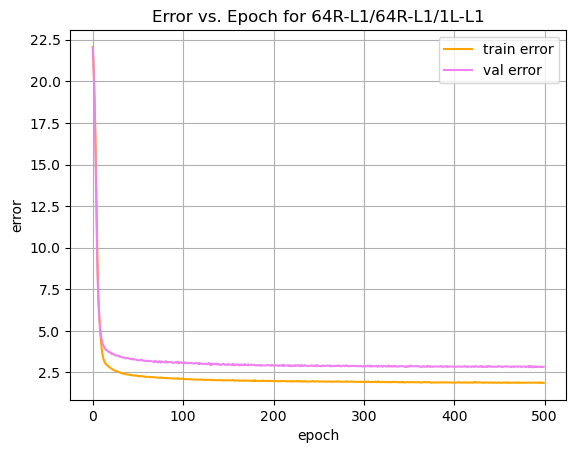

final_error: 1.8740967512130737
final val error: 2.849033832550049
final val - final train: 0.9749370813369751


In [35]:
l1_error = l1_reg_history.history['mean_absolute_error']
l1_val_error = l1_reg_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(l1_error, l1_val_error,
                              "error",
                              f"Error vs. Epoch for {l1_reg_model.name}")

print_errors_at_last_epoch(l1_error, l1_val_error)

In [36]:
# TODO: Your second new neural net for the problem
# Changing optimizer to SGD

sgd_reg_model = Sequential(name="64R-L2/64R-L2/1L-L2")
kernel_reg = l2(0.1)

sgd_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg,
                  input_shape=[13]))

sgd_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg)),

sgd_reg_model.add(Dense(1, activation='linear',
                       kernel_regularizer=kernel_reg,
                       bias_regularizer=kernel_reg))

sgd_reg_model.compile(loss='mean_squared_error',
                     optimizer='sgd',
                     metrics=['mean_absolute_error'])

sgd_reg_history = sgd_reg_model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))

Epoch 1/500
13/13 [==============================] - 1s 17ms/step - loss: 436.0042 - mean_absolute_error: 17.4602 - val_loss: 524.6254 - val_mean_absolute_error: 20.5297
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 286.9237 - mean_absolute_error: 13.1647 - val_loss: 204.7595 - val_mean_absolute_error: 11.9742
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 124.5841 - mean_absolute_error: 7.7876 - val_loss: 126.7987 - val_mean_absolute_error: 8.0038
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 106.6819 - mean_absolute_error: 6.6648 - val_loss: 49.1851 - val_mean_absolute_error: 4.0113
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 55.1401 - mean_absolute_error: 4.0109 - val_loss: 42.9083 - val_mean_absolute_error: 3.2049
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 48.8375 - mean_absolute_error: 3.7159 - val_loss: 50.8424 - val_mean_absolute_error: 3.446

13/13 [==============================] - 0s 5ms/step - loss: 18.5598 - mean_absolute_error: 2.1355 - val_loss: 37.5332 - val_mean_absolute_error: 3.2407
Epoch 51/500
13/13 [==============================] - 0s 5ms/step - loss: 19.4422 - mean_absolute_error: 2.2384 - val_loss: 30.8239 - val_mean_absolute_error: 3.4516
Epoch 52/500
13/13 [==============================] - 0s 5ms/step - loss: 27.8238 - mean_absolute_error: 2.9807 - val_loss: 35.6418 - val_mean_absolute_error: 3.5412
Epoch 53/500
13/13 [==============================] - 0s 5ms/step - loss: 25.8976 - mean_absolute_error: 2.9367 - val_loss: 31.0921 - val_mean_absolute_error: 2.8174
Epoch 54/500
13/13 [==============================] - 0s 5ms/step - loss: 17.7392 - mean_absolute_error: 2.1585 - val_loss: 30.8766 - val_mean_absolute_error: 3.1753
Epoch 55/500
13/13 [==============================] - 0s 5ms/step - loss: 17.5236 - mean_absolute_error: 2.1315 - val_loss: 28.7411 - val_mean_absolute_error: 3.1060
Epoch 56/500
13/1

13/13 [==============================] - 0s 5ms/step - loss: 28.7179 - mean_absolute_error: 2.9645 - val_loss: 62.9769 - val_mean_absolute_error: 4.3279
Epoch 100/500
13/13 [==============================] - 0s 5ms/step - loss: 21.3505 - mean_absolute_error: 2.4178 - val_loss: 67.2680 - val_mean_absolute_error: 5.6978
Epoch 101/500
13/13 [==============================] - 0s 6ms/step - loss: 23.2912 - mean_absolute_error: 2.6886 - val_loss: 33.9711 - val_mean_absolute_error: 3.4821
Epoch 102/500
13/13 [==============================] - 0s 5ms/step - loss: 17.8639 - mean_absolute_error: 2.1460 - val_loss: 24.6261 - val_mean_absolute_error: 2.5345
Epoch 103/500
13/13 [==============================] - 0s 5ms/step - loss: 18.2575 - mean_absolute_error: 2.2400 - val_loss: 22.6132 - val_mean_absolute_error: 2.4320
Epoch 104/500
13/13 [==============================] - 0s 5ms/step - loss: 24.3203 - mean_absolute_error: 2.6774 - val_loss: 28.3801 - val_mean_absolute_error: 2.8774
Epoch 105/50

13/13 [==============================] - 0s 5ms/step - loss: 16.9584 - mean_absolute_error: 2.1535 - val_loss: 35.9336 - val_mean_absolute_error: 3.8806
Epoch 149/500
13/13 [==============================] - 0s 5ms/step - loss: 18.4191 - mean_absolute_error: 2.2757 - val_loss: 34.1337 - val_mean_absolute_error: 3.2087
Epoch 150/500
13/13 [==============================] - 0s 5ms/step - loss: 18.4201 - mean_absolute_error: 2.2920 - val_loss: 27.0014 - val_mean_absolute_error: 2.5803
Epoch 151/500
13/13 [==============================] - 0s 5ms/step - loss: 20.5825 - mean_absolute_error: 2.3787 - val_loss: 71.5139 - val_mean_absolute_error: 6.0507
Epoch 152/500
13/13 [==============================] - 0s 5ms/step - loss: 20.6345 - mean_absolute_error: 2.4518 - val_loss: 24.8942 - val_mean_absolute_error: 2.4621
Epoch 153/500
13/13 [==============================] - 0s 5ms/step - loss: 16.4550 - mean_absolute_error: 2.0653 - val_loss: 71.4406 - val_mean_absolute_error: 6.3639
Epoch 154/50

13/13 [==============================] - 0s 5ms/step - loss: 21.0802 - mean_absolute_error: 2.5019 - val_loss: 27.9899 - val_mean_absolute_error: 2.9762
Epoch 198/500
13/13 [==============================] - 0s 5ms/step - loss: 18.9478 - mean_absolute_error: 2.3746 - val_loss: 22.8182 - val_mean_absolute_error: 2.5826
Epoch 199/500
13/13 [==============================] - 0s 5ms/step - loss: 16.3724 - mean_absolute_error: 2.0355 - val_loss: 21.0791 - val_mean_absolute_error: 2.2952
Epoch 200/500
13/13 [==============================] - 0s 5ms/step - loss: 19.5506 - mean_absolute_error: 2.3846 - val_loss: 25.4280 - val_mean_absolute_error: 2.5130
Epoch 201/500
13/13 [==============================] - 0s 5ms/step - loss: 21.7973 - mean_absolute_error: 2.6929 - val_loss: 37.6810 - val_mean_absolute_error: 3.0673
Epoch 202/500
13/13 [==============================] - 0s 5ms/step - loss: 19.2146 - mean_absolute_error: 2.4198 - val_loss: 27.9102 - val_mean_absolute_error: 2.8659
Epoch 203/50

13/13 [==============================] - 0s 5ms/step - loss: 28.4966 - mean_absolute_error: 2.8823 - val_loss: 64.2767 - val_mean_absolute_error: 5.6743
Epoch 247/500
13/13 [==============================] - 0s 6ms/step - loss: 40.4908 - mean_absolute_error: 4.1175 - val_loss: 26.9640 - val_mean_absolute_error: 3.0545
Epoch 248/500
13/13 [==============================] - 0s 7ms/step - loss: 21.3909 - mean_absolute_error: 2.5388 - val_loss: 45.7653 - val_mean_absolute_error: 4.2624
Epoch 249/500
13/13 [==============================] - 0s 6ms/step - loss: 18.1439 - mean_absolute_error: 2.2745 - val_loss: 30.9055 - val_mean_absolute_error: 2.8313
Epoch 250/500
13/13 [==============================] - 0s 5ms/step - loss: 22.5886 - mean_absolute_error: 2.7576 - val_loss: 40.7643 - val_mean_absolute_error: 4.1556
Epoch 251/500
13/13 [==============================] - 0s 6ms/step - loss: 36.1066 - mean_absolute_error: 3.6033 - val_loss: 94.1957 - val_mean_absolute_error: 7.1480
Epoch 252/50

13/13 [==============================] - 0s 5ms/step - loss: 26.6663 - mean_absolute_error: 2.9120 - val_loss: 48.2268 - val_mean_absolute_error: 4.1535
Epoch 296/500
13/13 [==============================] - 0s 5ms/step - loss: 19.9423 - mean_absolute_error: 2.4159 - val_loss: 27.3167 - val_mean_absolute_error: 2.5456
Epoch 297/500
13/13 [==============================] - 0s 5ms/step - loss: 24.7447 - mean_absolute_error: 2.7720 - val_loss: 53.7121 - val_mean_absolute_error: 4.3365
Epoch 298/500
13/13 [==============================] - 0s 5ms/step - loss: 21.4672 - mean_absolute_error: 2.4174 - val_loss: 27.2457 - val_mean_absolute_error: 3.1328
Epoch 299/500
13/13 [==============================] - 0s 5ms/step - loss: 28.1636 - mean_absolute_error: 2.8161 - val_loss: 56.0793 - val_mean_absolute_error: 5.9491
Epoch 300/500
13/13 [==============================] - 0s 5ms/step - loss: 26.1643 - mean_absolute_error: 2.9940 - val_loss: 58.1713 - val_mean_absolute_error: 4.3531
Epoch 301/50

13/13 [==============================] - 0s 5ms/step - loss: 18.2240 - mean_absolute_error: 2.2683 - val_loss: 26.8782 - val_mean_absolute_error: 2.9435
Epoch 345/500
13/13 [==============================] - 0s 5ms/step - loss: 16.0759 - mean_absolute_error: 1.9545 - val_loss: 84.1655 - val_mean_absolute_error: 5.7580
Epoch 346/500
13/13 [==============================] - 0s 5ms/step - loss: 17.6168 - mean_absolute_error: 2.1980 - val_loss: 26.9847 - val_mean_absolute_error: 2.8950
Epoch 347/500
13/13 [==============================] - 0s 6ms/step - loss: 17.6129 - mean_absolute_error: 2.1172 - val_loss: 23.9118 - val_mean_absolute_error: 2.4348
Epoch 348/500
13/13 [==============================] - 0s 5ms/step - loss: 17.4249 - mean_absolute_error: 2.1958 - val_loss: 51.0632 - val_mean_absolute_error: 4.9624
Epoch 349/500
13/13 [==============================] - 0s 5ms/step - loss: 22.0839 - mean_absolute_error: 2.5527 - val_loss: 39.5309 - val_mean_absolute_error: 3.7808
Epoch 350/50

13/13 [==============================] - 0s 5ms/step - loss: 20.3705 - mean_absolute_error: 2.4244 - val_loss: 47.7263 - val_mean_absolute_error: 3.5700
Epoch 394/500
13/13 [==============================] - 0s 5ms/step - loss: 16.5586 - mean_absolute_error: 2.0527 - val_loss: 49.1132 - val_mean_absolute_error: 4.7684
Epoch 395/500
13/13 [==============================] - 0s 5ms/step - loss: 17.9457 - mean_absolute_error: 2.2264 - val_loss: 37.5451 - val_mean_absolute_error: 3.6680
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 16.1952 - mean_absolute_error: 2.0061 - val_loss: 24.6077 - val_mean_absolute_error: 2.8548
Epoch 397/500
13/13 [==============================] - 0s 5ms/step - loss: 28.8550 - mean_absolute_error: 3.2350 - val_loss: 39.9556 - val_mean_absolute_error: 3.6009
Epoch 398/500
13/13 [==============================] - 0s 5ms/step - loss: 20.3184 - mean_absolute_error: 2.4887 - val_loss: 24.9629 - val_mean_absolute_error: 2.8472
Epoch 399/50

13/13 [==============================] - 0s 5ms/step - loss: 28.7434 - mean_absolute_error: 3.1260 - val_loss: 28.5735 - val_mean_absolute_error: 2.8503
Epoch 443/500
13/13 [==============================] - 0s 5ms/step - loss: 18.3507 - mean_absolute_error: 2.1326 - val_loss: 28.8219 - val_mean_absolute_error: 2.8908
Epoch 444/500
13/13 [==============================] - 0s 5ms/step - loss: 20.2304 - mean_absolute_error: 2.4606 - val_loss: 26.6896 - val_mean_absolute_error: 2.7814
Epoch 445/500
13/13 [==============================] - 0s 5ms/step - loss: 29.6203 - mean_absolute_error: 3.3229 - val_loss: 27.8306 - val_mean_absolute_error: 3.0224
Epoch 446/500
13/13 [==============================] - 0s 5ms/step - loss: 20.0561 - mean_absolute_error: 2.3290 - val_loss: 35.2801 - val_mean_absolute_error: 3.4520
Epoch 447/500
13/13 [==============================] - 0s 5ms/step - loss: 26.7058 - mean_absolute_error: 2.8440 - val_loss: 39.3977 - val_mean_absolute_error: 3.9512
Epoch 448/50

13/13 [==============================] - 0s 6ms/step - loss: 20.7358 - mean_absolute_error: 2.5341 - val_loss: 58.7385 - val_mean_absolute_error: 3.9491
Epoch 492/500
13/13 [==============================] - 0s 6ms/step - loss: 20.8847 - mean_absolute_error: 2.3651 - val_loss: 38.2592 - val_mean_absolute_error: 4.2871
Epoch 493/500
13/13 [==============================] - 0s 6ms/step - loss: 25.6363 - mean_absolute_error: 3.1698 - val_loss: 28.2260 - val_mean_absolute_error: 2.6458
Epoch 494/500
13/13 [==============================] - 0s 6ms/step - loss: 20.3255 - mean_absolute_error: 2.4210 - val_loss: 28.9284 - val_mean_absolute_error: 3.1835
Epoch 495/500
13/13 [==============================] - 0s 5ms/step - loss: 23.2127 - mean_absolute_error: 2.5521 - val_loss: 30.6998 - val_mean_absolute_error: 2.9199
Epoch 496/500
13/13 [==============================] - 0s 6ms/step - loss: 34.0780 - mean_absolute_error: 3.3251 - val_loss: 72.8675 - val_mean_absolute_error: 5.7116
Epoch 497/50

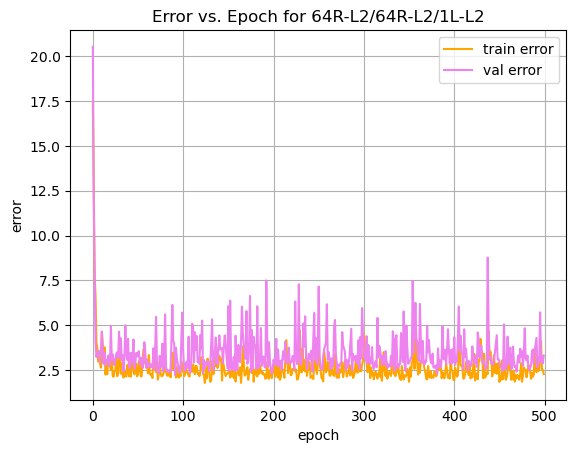

final_error: 2.2579822540283203
final val error: 3.2987422943115234
final val - final train: 1.0407600402832031


In [37]:
sgd_error = sgd_reg_history.history['mean_absolute_error']
sgd_val_error = sgd_reg_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(sgd_error, sgd_val_error,
                              "error",
                              f"Error vs. Epoch for {sgd_reg_model.name}")

print_errors_at_last_epoch(sgd_error, sgd_val_error)

In [38]:
# TODO: Your third new neural net for the problem
# Adding another dense layer with 32 units

added_reg_model = Sequential(name="64R-L1/64R-L1/32-L1/1L-L1")
kernel_reg = l1(0.1)

added_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg,
                  input_shape=[13]))

added_reg_model.add(Dense(64, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg)),

added_reg_model.add(Dense(32, activation='relu',
                  kernel_regularizer=kernel_reg,
                  bias_regularizer=kernel_reg)),

added_reg_model.add(Dense(1, activation='linear',
                       kernel_regularizer=kernel_reg,
                       bias_regularizer=kernel_reg))

added_reg_model.compile(loss='mean_squared_error',
                     optimizer='adam',
                     metrics=['mean_absolute_error'])

added_reg_history = added_reg_model.fit(x_train, y_train, shuffle=True, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test,y_test))

Epoch 1/500
13/13 [==============================] - 2s 20ms/step - loss: 633.7472 - mean_absolute_error: 21.6536 - val_loss: 625.1320 - val_mean_absolute_error: 21.5450
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 561.3305 - mean_absolute_error: 19.9888 - val_loss: 526.8101 - val_mean_absolute_error: 19.2230
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 439.4282 - mean_absolute_error: 16.8044 - val_loss: 365.2419 - val_mean_absolute_error: 14.7513
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 279.6425 - mean_absolute_error: 11.6559 - val_loss: 204.6719 - val_mean_absolute_error: 9.3881
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 183.2463 - mean_absolute_error: 8.0755 - val_loss: 164.0814 - val_mean_absolute_error: 7.4011
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 153.4186 - mean_absolute_error: 6.8304 - val_loss: 135.4064 - val_mean_absolute_erro

13/13 [==============================] - 0s 5ms/step - loss: 40.2453 - mean_absolute_error: 2.1304 - val_loss: 51.8801 - val_mean_absolute_error: 2.9463
Epoch 51/500
13/13 [==============================] - 0s 6ms/step - loss: 39.9355 - mean_absolute_error: 2.1286 - val_loss: 51.9088 - val_mean_absolute_error: 2.9605
Epoch 52/500
13/13 [==============================] - 0s 6ms/step - loss: 39.5857 - mean_absolute_error: 2.1233 - val_loss: 51.3164 - val_mean_absolute_error: 2.9301
Epoch 53/500
13/13 [==============================] - 0s 5ms/step - loss: 39.0915 - mean_absolute_error: 2.1122 - val_loss: 51.2499 - val_mean_absolute_error: 2.9859
Epoch 54/500
13/13 [==============================] - 0s 5ms/step - loss: 38.8972 - mean_absolute_error: 2.1173 - val_loss: 50.7565 - val_mean_absolute_error: 2.9314
Epoch 55/500
13/13 [==============================] - 0s 5ms/step - loss: 38.4495 - mean_absolute_error: 2.1061 - val_loss: 50.3242 - val_mean_absolute_error: 2.9667
Epoch 56/500
13/1

13/13 [==============================] - 0s 8ms/step - loss: 28.9181 - mean_absolute_error: 1.9571 - val_loss: 41.6407 - val_mean_absolute_error: 2.9008
Epoch 100/500
13/13 [==============================] - 0s 6ms/step - loss: 28.8076 - mean_absolute_error: 1.9619 - val_loss: 41.0050 - val_mean_absolute_error: 2.8238
Epoch 101/500
13/13 [==============================] - 0s 6ms/step - loss: 28.6270 - mean_absolute_error: 1.9537 - val_loss: 41.1065 - val_mean_absolute_error: 2.8311
Epoch 102/500
13/13 [==============================] - 0s 6ms/step - loss: 28.5208 - mean_absolute_error: 1.9561 - val_loss: 41.0713 - val_mean_absolute_error: 2.8838
Epoch 103/500
13/13 [==============================] - 0s 6ms/step - loss: 28.5576 - mean_absolute_error: 1.9779 - val_loss: 40.7923 - val_mean_absolute_error: 2.8041
Epoch 104/500
13/13 [==============================] - 0s 6ms/step - loss: 28.3357 - mean_absolute_error: 1.9859 - val_loss: 40.9798 - val_mean_absolute_error: 2.8960
Epoch 105/50

13/13 [==============================] - 0s 6ms/step - loss: 23.3944 - mean_absolute_error: 1.9120 - val_loss: 35.3346 - val_mean_absolute_error: 2.8767
Epoch 149/500
13/13 [==============================] - 0s 6ms/step - loss: 23.3111 - mean_absolute_error: 1.9153 - val_loss: 34.5281 - val_mean_absolute_error: 2.7196
Epoch 150/500
13/13 [==============================] - 0s 5ms/step - loss: 23.2472 - mean_absolute_error: 1.9296 - val_loss: 35.3995 - val_mean_absolute_error: 2.8914
Epoch 151/500
13/13 [==============================] - 0s 5ms/step - loss: 23.2135 - mean_absolute_error: 1.9304 - val_loss: 34.4237 - val_mean_absolute_error: 2.6972
Epoch 152/500
13/13 [==============================] - 0s 5ms/step - loss: 23.2454 - mean_absolute_error: 1.9208 - val_loss: 34.5133 - val_mean_absolute_error: 2.7769
Epoch 153/500
13/13 [==============================] - 0s 6ms/step - loss: 23.0651 - mean_absolute_error: 1.9406 - val_loss: 35.5708 - val_mean_absolute_error: 2.8700
Epoch 154/50

13/13 [==============================] - 0s 5ms/step - loss: 20.0811 - mean_absolute_error: 1.8786 - val_loss: 31.2822 - val_mean_absolute_error: 2.7202
Epoch 198/500
13/13 [==============================] - 0s 5ms/step - loss: 20.1276 - mean_absolute_error: 1.8747 - val_loss: 31.5833 - val_mean_absolute_error: 2.7567
Epoch 199/500
13/13 [==============================] - 0s 5ms/step - loss: 19.9960 - mean_absolute_error: 1.9002 - val_loss: 32.3730 - val_mean_absolute_error: 2.8778
Epoch 200/500
13/13 [==============================] - 0s 5ms/step - loss: 19.9495 - mean_absolute_error: 1.8993 - val_loss: 31.4000 - val_mean_absolute_error: 2.7641
Epoch 201/500
13/13 [==============================] - 0s 5ms/step - loss: 19.9372 - mean_absolute_error: 1.8892 - val_loss: 31.7005 - val_mean_absolute_error: 2.8519
Epoch 202/500
13/13 [==============================] - 0s 5ms/step - loss: 19.8051 - mean_absolute_error: 1.8733 - val_loss: 30.9843 - val_mean_absolute_error: 2.7610
Epoch 203/50

13/13 [==============================] - 0s 6ms/step - loss: 17.9476 - mean_absolute_error: 1.8685 - val_loss: 29.8947 - val_mean_absolute_error: 2.8590
Epoch 247/500
13/13 [==============================] - 0s 6ms/step - loss: 17.9095 - mean_absolute_error: 1.8618 - val_loss: 29.3314 - val_mean_absolute_error: 2.7431
Epoch 248/500
13/13 [==============================] - 0s 6ms/step - loss: 18.0074 - mean_absolute_error: 1.8507 - val_loss: 28.4761 - val_mean_absolute_error: 2.6956
Epoch 249/500
13/13 [==============================] - 0s 6ms/step - loss: 17.8732 - mean_absolute_error: 1.8596 - val_loss: 29.8313 - val_mean_absolute_error: 2.7958
Epoch 250/500
13/13 [==============================] - 0s 6ms/step - loss: 17.6463 - mean_absolute_error: 1.8345 - val_loss: 28.7249 - val_mean_absolute_error: 2.7408
Epoch 251/500
13/13 [==============================] - 0s 6ms/step - loss: 17.5963 - mean_absolute_error: 1.8321 - val_loss: 29.6735 - val_mean_absolute_error: 2.7879
Epoch 252/50

13/13 [==============================] - 0s 6ms/step - loss: 16.0373 - mean_absolute_error: 1.7864 - val_loss: 28.4859 - val_mean_absolute_error: 2.8188
Epoch 296/500
13/13 [==============================] - 0s 5ms/step - loss: 16.0526 - mean_absolute_error: 1.7966 - val_loss: 27.6164 - val_mean_absolute_error: 2.6926
Epoch 297/500
13/13 [==============================] - 0s 6ms/step - loss: 15.9959 - mean_absolute_error: 1.7847 - val_loss: 27.8317 - val_mean_absolute_error: 2.7683
Epoch 298/500
13/13 [==============================] - 0s 6ms/step - loss: 16.0030 - mean_absolute_error: 1.7805 - val_loss: 27.2310 - val_mean_absolute_error: 2.6894
Epoch 299/500
13/13 [==============================] - 0s 6ms/step - loss: 15.9757 - mean_absolute_error: 1.7893 - val_loss: 27.5344 - val_mean_absolute_error: 2.6980
Epoch 300/500
13/13 [==============================] - 0s 6ms/step - loss: 15.8625 - mean_absolute_error: 1.7752 - val_loss: 27.1455 - val_mean_absolute_error: 2.7100
Epoch 301/50

13/13 [==============================] - 0s 6ms/step - loss: 15.1685 - mean_absolute_error: 1.7845 - val_loss: 26.8967 - val_mean_absolute_error: 2.7138
Epoch 345/500
13/13 [==============================] - 0s 6ms/step - loss: 15.0076 - mean_absolute_error: 1.7481 - val_loss: 26.2400 - val_mean_absolute_error: 2.6832
Epoch 346/500
13/13 [==============================] - 0s 6ms/step - loss: 15.0195 - mean_absolute_error: 1.7523 - val_loss: 26.3826 - val_mean_absolute_error: 2.6904
Epoch 347/500
13/13 [==============================] - 0s 6ms/step - loss: 14.9852 - mean_absolute_error: 1.7607 - val_loss: 26.1567 - val_mean_absolute_error: 2.6362
Epoch 348/500
13/13 [==============================] - 0s 6ms/step - loss: 14.9873 - mean_absolute_error: 1.7706 - val_loss: 26.2992 - val_mean_absolute_error: 2.7073
Epoch 349/500
13/13 [==============================] - 0s 6ms/step - loss: 14.9678 - mean_absolute_error: 1.7446 - val_loss: 26.0868 - val_mean_absolute_error: 2.6468
Epoch 350/50

13/13 [==============================] - 0s 6ms/step - loss: 14.4190 - mean_absolute_error: 1.7448 - val_loss: 26.1883 - val_mean_absolute_error: 2.7049
Epoch 394/500
13/13 [==============================] - 0s 6ms/step - loss: 14.4359 - mean_absolute_error: 1.7433 - val_loss: 25.1780 - val_mean_absolute_error: 2.6330
Epoch 395/500
13/13 [==============================] - 0s 5ms/step - loss: 14.3847 - mean_absolute_error: 1.7369 - val_loss: 25.6278 - val_mean_absolute_error: 2.6490
Epoch 396/500
13/13 [==============================] - 0s 5ms/step - loss: 14.4112 - mean_absolute_error: 1.7402 - val_loss: 25.7182 - val_mean_absolute_error: 2.6670
Epoch 397/500
13/13 [==============================] - 0s 6ms/step - loss: 14.3166 - mean_absolute_error: 1.7286 - val_loss: 25.3468 - val_mean_absolute_error: 2.6050
Epoch 398/500
13/13 [==============================] - 0s 6ms/step - loss: 14.4275 - mean_absolute_error: 1.7328 - val_loss: 25.0113 - val_mean_absolute_error: 2.6305
Epoch 399/50

13/13 [==============================] - 0s 8ms/step - loss: 13.8906 - mean_absolute_error: 1.7126 - val_loss: 24.7660 - val_mean_absolute_error: 2.6104
Epoch 443/500
13/13 [==============================] - 0s 6ms/step - loss: 13.9221 - mean_absolute_error: 1.7105 - val_loss: 25.0724 - val_mean_absolute_error: 2.6304
Epoch 444/500
13/13 [==============================] - 0s 6ms/step - loss: 13.9584 - mean_absolute_error: 1.7268 - val_loss: 24.8124 - val_mean_absolute_error: 2.5950
Epoch 445/500
13/13 [==============================] - 0s 6ms/step - loss: 13.8880 - mean_absolute_error: 1.7123 - val_loss: 24.9691 - val_mean_absolute_error: 2.6153
Epoch 446/500
13/13 [==============================] - 0s 6ms/step - loss: 13.9473 - mean_absolute_error: 1.7358 - val_loss: 24.9875 - val_mean_absolute_error: 2.6312
Epoch 447/500
13/13 [==============================] - 0s 6ms/step - loss: 13.8600 - mean_absolute_error: 1.7124 - val_loss: 25.1933 - val_mean_absolute_error: 2.6254
Epoch 448/50

13/13 [==============================] - 0s 6ms/step - loss: 13.5737 - mean_absolute_error: 1.7023 - val_loss: 24.6296 - val_mean_absolute_error: 2.6314
Epoch 492/500
13/13 [==============================] - 0s 6ms/step - loss: 13.5646 - mean_absolute_error: 1.7091 - val_loss: 24.2601 - val_mean_absolute_error: 2.5771
Epoch 493/500
13/13 [==============================] - 0s 6ms/step - loss: 13.6835 - mean_absolute_error: 1.6994 - val_loss: 24.2434 - val_mean_absolute_error: 2.5789
Epoch 494/500
13/13 [==============================] - 0s 6ms/step - loss: 13.5772 - mean_absolute_error: 1.6933 - val_loss: 24.1420 - val_mean_absolute_error: 2.5796
Epoch 495/500
13/13 [==============================] - 0s 6ms/step - loss: 13.6021 - mean_absolute_error: 1.7172 - val_loss: 24.8308 - val_mean_absolute_error: 2.6084
Epoch 496/500
13/13 [==============================] - 0s 6ms/step - loss: 13.5928 - mean_absolute_error: 1.7042 - val_loss: 24.4062 - val_mean_absolute_error: 2.5876
Epoch 497/50

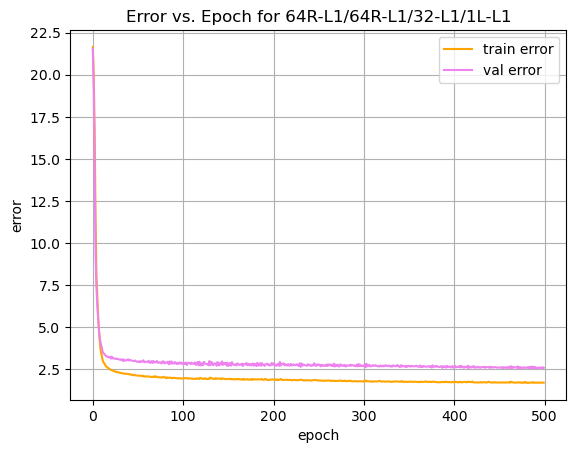

final_error: 1.707452654838562
final val error: 2.5888946056365967
final val - final train: 0.8814419507980347


In [39]:
added_error = added_reg_history.history['mean_absolute_error']
added_val_error = added_reg_history.history['val_mean_absolute_error']

plot_train_and_val_quantities(added_error, added_val_error,
                              "error",
                              f"Error vs. Epoch for {added_reg_model.name}")

print_errors_at_last_epoch(added_error, added_val_error)